# Capstone Project - Analysis of the Corona pandemic
In this project, data from the ongoing "Corona" pandemic is analyzed. The SARS-CoV-2 virus has spread around the world in a relatively short time after its first apperance in Wuhan (China) and the caused disease COVID-19 (=coronavirus disease 2019) stresses the healthcare systems in many countries. The driving forces for the exponential growths rates and the effective of the measures are analyzed.

Therefor, two datasets are analyzed:

1. One dataset has been taken from the CSSE at Johns Hopkins University: It shows timeseries regarding cumulative Corona cases of all affected countries. The data has been taken from the following GitHub repository. Please note, that the data is updated every day. Thus, there might be effects on the conclusion in a few weeks. For this analysis, data taken on April 14th has been used (stored in DataScience_Project4 GitHub): https://github.com/CSSEGISandData/COVID-19/edit/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

2. Another dataset has been downloaded from Kaggle. It gives an overview on different Corona-related information for the affected countries: https://www.kaggle.com/koryto/countryinfo#covid19countryinfo.csv

## 1. Questions
The main questions are:
1. What are the effects of the initial situation in the different countries on the exponential growth rate?
2. What are the effects of the different measures to contain the disease?

To answer these questions, it is - after a general data understanding - checked for correlations between measures in the data. In a second step it is checked whether it is possible to predict growth and containment.


## 2. Data understanding
The data is loaded and a number of things are checked to understand the datasets.


In [1]:
# Import standard packages
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython import display
%matplotlib inline

# Import additional packages
from scipy.signal import savgol_filter # Implements specific filter (Savitzky-Golay) to smooth statistical fluctuations
from scipy.signal import medfilt # Implements median filter
from datetime import date
import math
import capstone_support_functions as capstone

# Import helper functions stored in 

# Set output options in a way that all columns and rows of the used datasets are visible
pd.set_option('display.max_columns', 1000)
pd.set_option("display.max_rows", 1000)

df_timeseries = pd.read_csv('./time_series_covid19_confirmed_global.csv') # Read in timeseries data
df_countryinfo = pd.read_csv('./covid19countryinfo.csv') # Read in country information data

#df_tests = pd.read_csv('./covid19tests.csv') # Read in data

### Check the timeseries data

In [2]:
# Show the timeseries data
df_timeseries.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0        0        0        0        0        0        1        1        1   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        1        1   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        1        1        1       1       1       1       1       1       1   
1        0        0        0       0       0       0       0       0       0   
2        1        1        1       1       3       5      12      12      17   
3        0        0        0       0       1       1       1       1       1   
4        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
0       1       4       4        5        7        7        7       11   
1       0       0       2       10       12       23       33       38   
2      17      19      20       20       20       24       26       37   
3       1       1       1        1        1        1        1        1   
4       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0       16       21       22       22       22       24       24       40   
1       42       51       55       59       64       70       76       89   
2       48       54       60       74       87       90      139      201   
3        1        2       39       39       53       75       88      113   
4        0        0        0        0        0        1        2        2   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
0       40       74       84       94      110      110      120      170   
1      104      123      146      174      186      197      212      223   
2      230      264      302      367      409   

In [3]:
print('The dataset contains', df_timeseries.shape[0], 'rows and', df_timeseries.shape[1], 'columns.')

The dataset contains 264 rows and 97 columns.


In [4]:
df_timeseries['Country/Region'].value_counts()

China                               33
Canada                              15
France                              11
United Kingdom                      11
Australia                            8
Netherlands                          5
Denmark                              3
Eritrea                              1
Singapore                            1
Dominican Republic                   1
Niger                                1
Iceland                              1
Venezuela                            1
Bolivia                              1
Oman                                 1
Zambia                               1
Mauritania                           1
India                                1
Mongolia                             1
Sweden                               1
Burma                                1
Saint Kitts and Nevis                1
Congo (Kinshasa)                     1
Saint Vincent and the Grenadines     1
Peru                                 1
Libya                    

The timeseries contains the number of Corona cases for 258 countries/regions for a time period beginning on January 22, 2020. In some cases, there is a differentiation between different provinces/states of a country, e.g. 33 different ones for China. Furthermore, the latitutde and longitude of the countries are shown.

In the next step, the number of cases are plotted. Thereby, the countries with the highest number of cases at the end of the timeseries are shown. Before, the functionality is implemented into a function which will be reused later.

In [5]:
def visualize_timeseries(df, logy_scale):
    '''
    INPUT:
    df - pandas dataframe with timeseries
    number_of_top_countries - Number of countries with the highest number of cases which are visualized
    
    Description:
    The input timeseries is visualized with a line chart
    '''
    
    # Remove nan values
    if 'Province/State' in df:
        df['Province/State'].fillna("", inplace=True)

    # Add a column country that combines Country/Region and Province/State (if not already done)
    if not('Country' in df):
        df['Country']=df['Country/Region']+" "+df['Province/State']

    # Define the country column as the new index (later on shown in the plot legend)
    df.set_index('Country', inplace=True)

    # Delete all columns which are not needed for the plot
    values_found=False
    for col_name, col_data in df.iteritems():
        if col_name=='1' or col_name=='1/22/20':
            values_found=True
        if not(values_found):
            del df[col_name]
                
    if 'Max_Value' in df:
        del df['Max_Value']
    if 'Max_Index' in df:
        del df['Max_Index']
        
    # Exchange rows and columns which is required for the plot function (in line charts columns are plotted)
    df=df.transpose()
    
    # Create plot
    plt.style.use('seaborn') # Define style  
    df.plot(kind='line', legend=True, logy=logy_scale, mark_right=True)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) # Show legend outside of the plot
    plt.show()

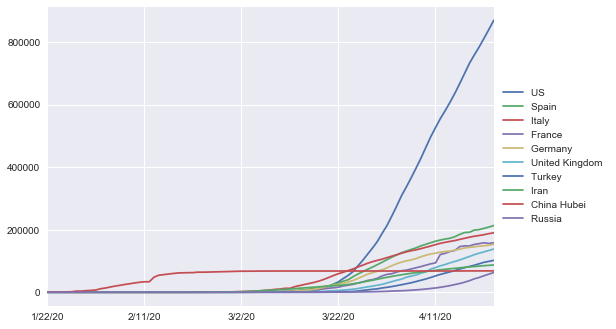

In [6]:
# Visualize the 10 countries with the highest number of infections (sorted ascendingly and select top 10)
visualize_timeseries(df_timeseries.sort_values(by=df_timeseries.columns[-1], ascending=False).head(10), False)

The plot above shows the typical chart maybe known from news coverage. It shows typical exponential growth curves for most of the countries. After some days, the growth seems to change to a more linear growth. Two curves have a very specific shape. The US curves shows the highest growth rate while for China the growth has stopped after a second steep increase mid of February.

### Check the country information data

In [7]:
# Show countryinfo
df_countryinfo.head(20)

region              country alpha3code alpha2code          pop    tests  \
0     NaN          Afghanistan        AFG         AF   38,928,346      NaN   
1     NaN              Albania        ALB         AL    2,877,797      NaN   
2     NaN              Algeria        DZA         DZ   43,851,044      NaN   
3     NaN              Andorra        AND         AD       77,265      NaN   
4     NaN  Antigua and Barbuda        ATG         AG       97,929      NaN   
5     NaN            Argentina        ARG         AR   45,195,774      NaN   
6     NaN              Armenia        ARM         AM    2,963,243    694.0   
7   Aruba          Netherlands        ABW         AW      106,766      NaN   
8     NaN            Australia        AUS         AU   25,499,884  31635.0   
9     NaN              Austria        AUT         AT    9,006,398  10278.0   
10    NaN           Azerbaijan        AZE         AZ   10,139,177      NaN   
11    NaN              Bahamas        BHS         BS      393,244      NaN   
12    NaN              Bahrain        BHR         BH    1,701,575  13553.0   
13    NaN           Bangladesh        BGD         BD  164,689,383      NaN   
14    NaN             Barbados        BRB         BB      287,375      NaN   
15    NaN              Belarus        BLR         BY    9,449,323  16000.0   
16    NaN              Belgium        BEL         BE   11,589,623   4225.0   
17    NaN               Belize        BLZ         BZ      397,628      NaN   
18    NaN                Benin        BEN         BJ   12,123,200      NaN   
19    NaN               Bhutan        BTN         BT      771,608      NaN   

        testpop  density  medianage  urbanpop quarantine schools publicplace  \
0           NaN     60.0       18.0      25.0        NaN     NaN         NaN   
1           NaN    105.0       36.0      63.0        NaN     NaN         NaN   
2           NaN     18.0       29.0      73.0        NaN     NaN         NaN   
3           NaN    164.0       45.0      88.0        NaN     NaN         NaN   
4           NaN    223.0       34.0      26.0        NaN     NaN         NaN   
5           NaN     17.0       32.0      93.0  3/20/2020     NaN         NaN   
6   4269.802594    104.0       35.0      63.0        NaN     NaN         NaN   
7           NaN    593.0       41.0      44.0        NaN     NaN         NaN   
8    806.065560      3.0       38.0      86.0        NaN     NaN   3/23/2020   
9    876.279237    109.0       43.0      57.0  3/16/2020     NaN         NaN   
10          NaN    123.0       32.0      56.0        NaN     NaN         NaN   
11          NaN     39.0       32.0      86.0        NaN     NaN         NaN   
12   125.549694   2239.0       32.0      89.0        NaN     NaN         NaN   
13          NaN   1265.0       28.0      39.0        NaN     NaN         NaN   
14          NaN    668.0       40.0      31.0        NaN     NaN         NaN   
15   590.582688     47.0       40.0      79.0        NaN     NaN         NaN   
16  2743.106036    383.0       42.0      98.0  3/18/2020     NaN         NaN   
17          NaN     17.0       24.0      46.0        NaN     NaN         NaN   
18          NaN    108.0       19.0      48.0        NaN     NaN         NaN   
19          NaN     20.0       28.0      46.0        NaN     NaN         NaN   

    gatheringlimit  gathering nonessential  hospibed  smokers  sex0  sex14  \
0              NaN        NaN          NaN       0.5      NaN  1.05   1.03   
1              NaN        NaN          NaN       2.9    29.40  1.08   1.11   
2              NaN        NaN          NaN       1.9      NaN  1.05   1.05   
3              NaN        NaN          NaN       2.5    32.50  1.07   1.05   
4              NaN        NaN          NaN       3.8      NaN  1.05   1.03   
5              NaN        NaN          NaN       5.0    23.95  1.05   1.06   
6              NaN        NaN          NaN       4.2    26.90  1.13   1.14   
7              NaN        NaN          NaN       1.2      N

In [8]:
print('The dataset contains', df_countryinfo.shape[0], 'rows and', df_countryinfo.shape[1], 'columns.')

The dataset contains 249 rows and 60 columns.


In [9]:
# Get an overview on the dataset
df_countryinfo.describe()

tests        testpop       density   medianage    urbanpop  \
count      52.000000      52.000000    187.000000  187.000000  187.000000   
mean    30192.903846   22281.534633    412.743316   32.084492   64.087166   
std     65479.055781   67986.836475   2083.936842    9.455375   22.164482   
min       500.000000      35.588092      0.000000   15.200000   15.000000   
25%      1505.500000     794.582044     35.500000   24.700000   46.500000   
50%      5950.000000    2811.814632     94.000000   32.000000   66.000000   
75%     16121.000000    5943.719566    233.000000   40.000000   83.000000   
max    320000.000000  415993.107300  26337.000000   62.000000  100.000000   

       gatheringlimit    hospibed     smokers        sex0       sex14  \
count       32.000000  186.000000  123.000000  187.000000  187.000000   
mean        98.281250    3.299401   21.986992    1.051390    1.045989   
std        218.532973    2.806039    9.005344    0.026664    0.030311   
min          2.000000    0.100000    3.700000    0.940000    0.970000   
25%         10.000000    1.300000   15.150000    1.035000    1.030000   
50%         10.000000    2.600000   22.450000    1.050000    1.050000   
75%         50.000000    4.575000   27.350000    1.060000    1.060000   
max       1000.000000   14.353400   42.650000    1.260000    1.170000   

            sex25       sex54       sex64   sex65plus    sexratio        lung  \
count  187.000000  187.000000  187.000000  187.000000  186.000000  164.000000   
mean     1.050107    1.043422    0.959679    0.796952    1.007204   24.505549   
std      0.133025    0.345960    0.261363    0.155203    0.207092   15.475574   
min      0.830000    0.710000    0.580000    0.450000    0.840000    6.290000   
25%      1.010000    0.970000    0.870000    0.715000    0.960000   16.320000   
50%      1.040000    1.010000    0.950000    0.790000    0.990000   21.295000   
75%      1.060000    1.035000    0.995000    0.860000    1.010000   27.117500   
max      2.640000    4.910000    3.380000    1.710000    3.410000  114.280000   

       femalelung    malelung   healthperpop   fertility     avgtemp  \
count  164.000000  164.000000     183.000000  185.000000  152.000000   
mean    18.920122   32.088841    2355.124042    2.482649   19.312829   
std     13.932863   19.537331   11877.522514    1.221939   10.899411   
min      0.690000    9.210000       0.172463    0.200000   -9.883333   
25%     10.902500   21.540000      11.883978    1.690000    9.708333   
50%     16.485000   26.865000      89.112200    2.000000   20.525000   
75%     23.050000   34.890000     465.193200    2.820000   28.283333   
max     94.590000  174.880000  108308.036900    6.950000   40.150000   

       avghumidity  newdeaths30  newdeaths31  newdeaths1  newdeaths2  \
count   152.000000    56.000000    66.000000   68.000000   67.000000   
mean     67.653838    22.910714    52.651515   47.617647   45.477612   
std      14.499465    76.898818   146.624113  140.513348  139.384291   
min      10.983333     1.000000     1.000000    1.000000    1.000000   
25%      62.200000     1.000000     1.000000    1.000000    2.000000   
50%      72.425000     3.000000     4.000000    3.500000    3.000000   
75%      77.945833     6.000000    13.000000   14.000000   10.000000   
max      92.316667   537.000000   837.000000  727.000000  760.000000   

       newdeaths3  deathdiv1m  
count   56.000000  135.000000  
mean    45.767857   18.720593  
std    135.124991   83.240696  
min      1.000000    0.010000  
25%      1.000000    0.300000  
50%      4.000000    1.000000  
75%     10.250000    6.000000  
max    684.000000  884.000000

The first check shows that the meanings of country and region columns are different in the countryinfo dataset in comparison to the timeseries set. Thus, some data preparation is required to combine the data. Furthermore, the countryinfo dataset contains many fields with "nan" and the colums for population ("pop"), GDP ("gdp2019"), and health expenses ("healthexp") are not interpreted as a number. Additionally, the columns for the number of tests and the test population are, unfortunately, outdated since the description of the dataset shows that these numbers have been updated on March 24, 2020. Thus, they will not be used in the following analysis. There are also some information on detected cases per day. However, these information are taken from the other dataset.

In the follwing cells some information contained in the data are visualized to get a better overview on some details that might be helpful to answer the questions behind this analysis.

Text(0, 0.5, 'Frequency')

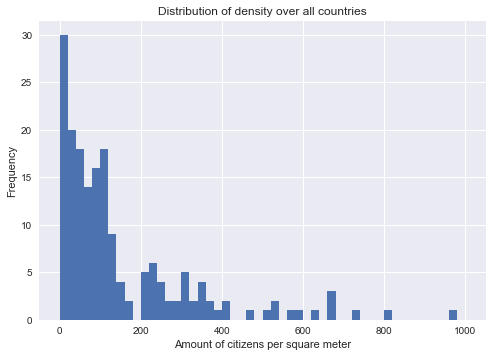

In [10]:
# Create a histogram of the density distribution
df_countryinfo['density'].hist(bins=50, range=(0, 1000))
plt.title("Distribution of density over all countries")
plt.xlabel('Amount of citizens per square meter')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

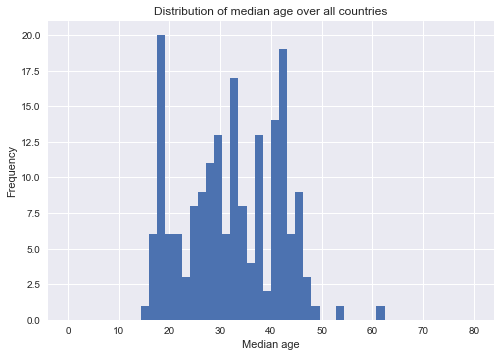

In [11]:
# Create a histogram of the median age distribution
df_countryinfo['medianage'].hist(bins=50, range=(0, 80))
plt.title("Distribution of median age over all countries")
plt.xlabel('Median age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

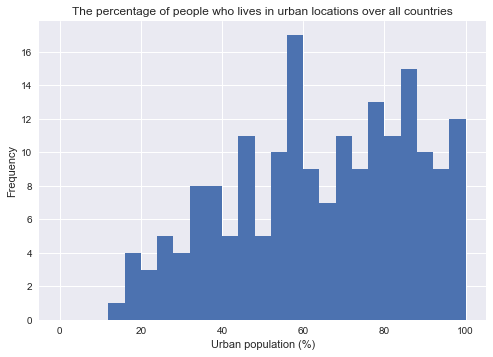

In [12]:
# Create a histogram of the percentage of people who lives in urban locations
df_countryinfo['urbanpop'].hist(bins=25, range=(0, 100))
plt.title("The percentage of people who lives in urban locations over all countries")
plt.xlabel('Urban population (%)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

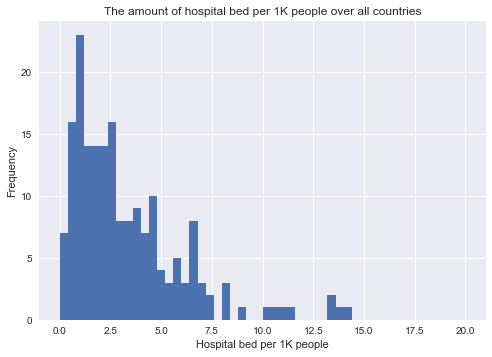

In [13]:
# Create a histogram of the amount of hospital bed per 1K people
df_countryinfo['hospibed'].hist(bins=50, range=(0, 20))
plt.title("The amount of hospital bed per 1K people over all countries")
plt.xlabel('Hospital bed per 1K people')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

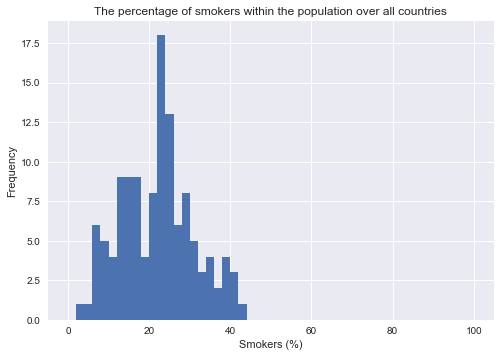

In [14]:
# Create a histogram of the % of smokers within the population.
df_countryinfo['smokers'].hist(bins=50, range=(0, 100))
plt.title("The percentage of smokers within the population over all countries")
plt.xlabel('Smokers (%)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

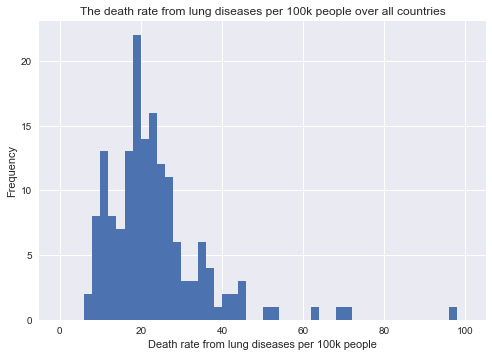

In [15]:
# Create a histogram of the death rate from lung diseases per 100k people
df_countryinfo['lung'].hist(bins=50, range=(0, 100))
plt.title("The death rate from lung diseases per 100k people over all countries")
plt.xlabel('Death rate from lung diseases per 100k people')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

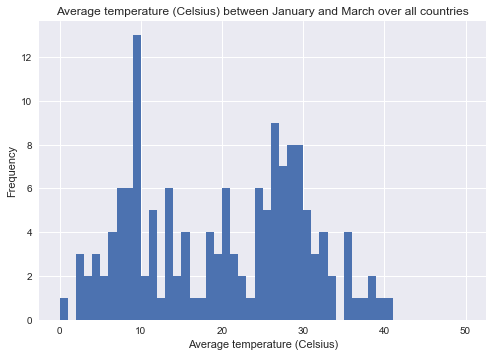

In [16]:
# Create a histogram of the average temperature (Celsius) between January and March 
df_countryinfo['avgtemp'].hist(bins=50, range=(0, 50))
plt.title("Average temperature (Celsius) between January and March over all countries")
plt.xlabel('Average temperature (Celsius)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

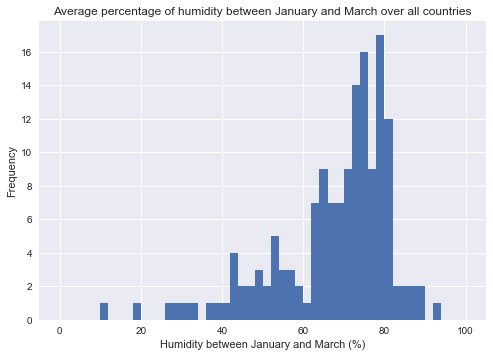

In [17]:
# Create a histogram of the average percentage of humidity between January and March
df_countryinfo['avghumidity'].hist(bins=50, range=(0, 100))
plt.title("Average percentage of humidity between January and March over all countries")
plt.xlabel('Humidity between January and March (%)')
plt.ylabel('Frequency')

It shall be checked later on whether the plotted measures have an effect on the exponentual growth rate of the outbreaks. Furthermore, the table contains other information like dates when specifc measures against the disease have been started, e.g. school closure policy. These dates might help to analyse the containment effects.

## 3. Data preparation
### Timeseries dataset
The timeseries set contains columns for each day from January 22, 2020 to show the number of cases for each country/region (as plotted above). Since the timeseries shall later on be combined with the country information dataset, it is necessary to ensure that the timeseries can be assigned to the correct country information. Thus, some preparation is required. As shown in the last chapter, some Countries/Regions are subdivided into different Provinces/States. Since the corresponding information does not exist in the country information set, the different Provinces/States are first combined by summing up the case numbers with the following function.

In [18]:
def combine_countries(df, name):
    '''
    INPUT:
    df - pandas dataframe with timeseries
    name - string with a Country/Region for which the rows shall be combined
    
    Description:
    The function combines rows which belong to the same Country/Region by summing up the case numbers.
    For Lat and Long the mean is used. Note: This might be not the best approach in case of oversea provinces.
    '''
    
    # Copy input dataframe into output dataframe
    df_output=df.copy()
    
    # Create a new series
    new_row=pd.Series()
    
    # Assign a field for Country/Region
    new_row['Country/Region']=name
    
    # Iterate over all rows
    row_initialized=False
    counter=0
    for index, row in df_output.iterrows():
        if name==row['Country/Region']:
            
            # If the Country/Region in a row fits to name, the value of all columns are added to the new series
            for col_name, col_data in df_output.iteritems():
                if col_name!='Province/State' and col_name!='Country/Region':
                    
                    # Initially, each value of the new series is initialized
                    if not(row_initialized):
                        new_row.at[col_name]=0
                        
                    # Sum up
                    new_row.at[col_name]=new_row.at[col_name]+df_output.at[index, col_name]
                    
            row_initialized=True # Make sure to initialize only once
            counter=counter+1 # Count up every time the name==Country/Region
            
    # Take the mean of lat and long values. Note: This might be not the best approach in case of oversea provinces.
    new_row.at['Lat']=new_row.at['Lat'] / counter
    new_row.at['Long']=new_row.at['Long'] / counter
            
    # Add the new series to the output dataframe 
    df_output=df_output.append(new_row, ignore_index=True)

    return df_output # Return output dataframe

In [19]:
# Combine all Provinces/States by using the combine_countries function
df_timeseries_combined=df_timeseries.copy()
df_timeseries_combined=combine_countries(df_timeseries_combined, 'China')
df_timeseries_combined=combine_countries(df_timeseries_combined, 'Canada')
df_timeseries_combined=combine_countries(df_timeseries_combined, 'France')
df_timeseries_combined=combine_countries(df_timeseries_combined, 'United Kingdom')
df_timeseries_combined=combine_countries(df_timeseries_combined, 'Australia')
df_timeseries_combined=combine_countries(df_timeseries_combined, 'Netherlands')
df_timeseries_combined=combine_countries(df_timeseries_combined, 'Denmark')

# Replace NaNs by empty entries
df_timeseries_combined['Province/State'].fillna("", inplace=True)

# Remove rows which are no longer required (since provinces/states have been combined in new rows)
df_timeseries_combined=df_timeseries_combined[df_timeseries_combined['Province/State']=='']

# Sort according to Country/Region
df_timeseries_combined=df_timeseries_combined.sort_values(by='Country/Region')

# Drop further duplicates (countries without provinces which are already listed individually in original table)
df_timeseries_combined=df_timeseries_combined.drop([94]) # Denmark
df_timeseries_combined=df_timeseries_combined.drop([116]) # France
df_timeseries_combined=df_timeseries_combined.drop([169]) # Netherlands
df_timeseries_combined=df_timeseries_combined.drop([223]) # United Kingdom

# Reset the index (so that there are no gaps due to removed rows)
df_timeseries_combined=df_timeseries_combined.reset_index(drop=True)

In [20]:
df_timeseries_combined.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0                   Afghanistan  33.0000  65.0000        0        0        0   
1                       Albania  41.1533  20.1683        0        0        0   
2                       Algeria  28.0339   1.6596        0        0        0   
3                       Andorra  42.5063   1.5218        0        0        0   
4                        Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0        0        0        0        0        0        1        1        1   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        1        1   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        1        1        1       1       1       1       1       1       1   
1        0        0        0       0       0       0       0       0       0   
2        1        1        1       1       3       5      12      12      17   
3        0        0        0       0       1       1       1       1       1   
4        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
0       1       4       4        5        7        7        7       11   
1       0       0       2       10       12       23       33       38   
2      17      19      20       20       20       24       26       37   
3       1       1       1        1        1        1        1        1   
4       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0       16       21       22       22       22       24       24       40   
1       42       51       55       59       64       70       76       89   
2       48       54       60       74       87       90      139      201   
3        1        2       39       39       53       75       88      113   
4        0        0        0        0        0        1        2        2   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
0       40       74       84       94      110      110      120      170   
1      104      123      146      174      186      197      212      223   
2      230      264      302      367      409   

In [21]:
df_timeseries_combined.shape[0]

185

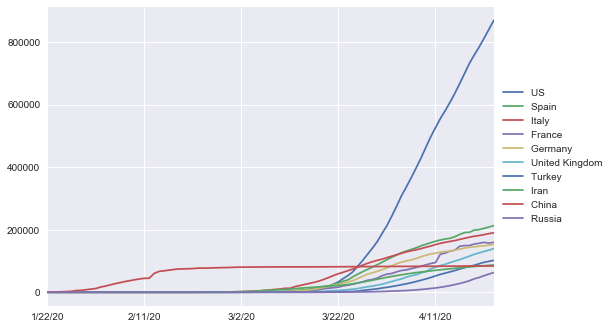

In [22]:
# Visualize the 10 countries with the highest number of infections (sorted ascendingly and select top 10)
visualize_timeseries(df_timeseries_combined.sort_values(by=df_timeseries_combined.columns[-1], ascending=False).head(10), False)

#### Create normalized timeseries dataset to overlay the rates of increase for all countries

The start dates of the outbreaks in the different countries/regions were very different. In order to compare them, the first step is to normalize everything to a "day 1" which is the day when a specific number of cases has been detected in each individual country. After that it would be possible to compare the overlaying curves.

In [23]:
# Define the outbreak threshold: The day the value is reached is "day 1"
outbreak_threshold=100

In [24]:
def normalize_timeseries(df, outbreak_threshold):
    '''
    INPUT:
    df - pandas dataframe with timeseries
    outbreak_threshold - int value describing at which minimal number of cases the series starts ("day 1").
                         Idea is that smaller outbreaks which are under control are not counted.
    
    OUTPUT:
    df - pandas dataframe with normalized timeseries
    
    Description:
    The input timeseries are normalized to a "day 1"
    '''

    # Create a new dataframe and copy the first 4 columns of the input set
    df_output=pd.DataFrame()
    df_output['Province/State']=df['Province/State']
    df_output['Country/Region']=df['Country/Region']
    df_output['Lat']=df['Lat']
    df_output['Long']=df['Long']
    df_output['Infections']=0 # New column which is later on used for sorting
    df_output['Outbreak_Start']='' # New column which is used to store the date of a detected outbreak (which exceeds threshold)
    
    # Iterate over all rows
    for index, row in df.iterrows():
    
        # Iterate over all columns
        counter=0
        new_column=1 # Counter for the columns in output dataframe
        for col_name, col_data in df.iteritems():
            counter=counter+1 # Count the columns
            if counter>4:     # The timeseries start from column 5
                if df.at[index, col_name]>outbreak_threshold or new_column>1: # If threshold is exceeded or if timeseries has already started
                    # Store the date of the outbreak by using the name of the original columns in which the case threshold has been exceeded
                    if new_column==1:
                        df_output.at[index, 'Outbreak_Start']=col_name       
                    df_output.at[index, str(new_column)]=df.at[index, col_name] # Copy case number in new column in output
                    new_column=new_column+1 # Count up column
                    
        # Add the number of infections
        df_output.at[index, 'Infections']=df.iloc[index, -1]
                    
    return df_output # Return output dataframe

In [25]:
df_norm=normalize_timeseries(df_timeseries_combined, outbreak_threshold)
df_norm.head(20)

Province/State       Country/Region        Lat        Long  Infections  \
0                          Afghanistan  33.000000   65.000000        1279   
1                              Albania  41.153300   20.168300         663   
2                              Algeria  28.033900    1.659600        3007   
3                              Andorra  42.506300    1.521800         723   
4                               Angola -11.202700   17.873900          25   
5                  Antigua and Barbuda  17.060800  -61.796400          24   
6                            Argentina -38.416100  -63.616700        3435   
7                              Armenia  40.069100   45.038200        1523   
8                            Australia -31.996188  141.232788        6662   
9                              Austria  47.516200   14.550100       15002   
10                          Azerbaijan  40.143100   47.576900        1548   
11                             Bahamas  25.034300  -77.396300          72   
12                             Bahrain  26.027500   50.550000        2217   
13                          Bangladesh  23.685000   90.356300        4186   
14                            Barbados  13.193900  -59.543200          76   
15                             Belarus  53.709800   27.953400        8022   
16                             Belgium  50.833300    4.000000       42797   
17                              Belize  13.193900  -59.543200          18   
18                               Benin   9.307700    2.315800          54   
19                              Bhutan  27.514200   90.433600           7   

   Outbreak_Start      1      2      3      4      5      6      7      8  \
0         3/27/20  110.0  110.0  120.0  170.0  174.0  237.0  273.0  281.0   
1         3/23/20  104.0  123.0  146.0  174.0  186.0  197.0  212.0  223.0   
2         3/21/20  139.0  201.0  230.0  264.0  302.0  367.0  409.0  454.0   
3         3/22/20  113.0  133.0  164.0  188.0  224.0  267.0  308.0  334.0   
4                    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5                    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6         3/20/20  128.0  158.0  266.0  301.0  387.0  387.0  502.0  589.0   
7         3/19/20  115.0  136.0  160.0  194.0  235.0  249.0  265.0  290.0   
8         3/10/20  107.0  128.0  128.0  200.0  250.0  297.0  377.0  452.0   
9          3/8/20  104.0  131.0  182.0  246.0  302.0  504.0  655.0  860.0   
10        3/26/20  122.0  165.0  182.0  209.0  273.0  298.0  359.0  400.0   
11                   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12        3/10/20  110.0  195.0  195.0  195.0  210.0  214.0  214.0  228.0   
13         4/6/20  123.0  164.0  218.0  330.0  424.0  482.0  621.0  803.0   
14                   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
15        3/30/20  152.0  152.0  163.0  304.0  351.0  440.0  562.0  700.0   
16         3/6/20  109.0  169.0  200.0  239.0  267.0  314.0  314.0  559.0   
17                   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
18                   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19                   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         9      10      11      12      13      14      15      16      17  \
0    299.0   349.0   367.0   423.0   444.0   484.0   521.0   555.0   607.0   
1    243.0   259.0   277.0   304.0   333.0   361.0   377.0   383.0   400.0   
2    511.0   584.0   716.0   847.0   986.0  1171.0  1251.0  1320.0  1423.0   
3    370.0   376.0   390.0   428.0   439.0   466.0   501.0   525.0   545.0   
4      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6    690.0   745.0   820.0  1054.0  1054.0  1133.0  1265.0  1451.0  1451.0   
7    329.0   407.0   424.0   482.0   532.0   571.0   663.0   736.0   770.0   
8    568.0   681.0   791.0  1071.0  1549.0  1682.0  2044.0  2364.

Now all timeseries start on the same day (column "1"). In the following, the countries with the highest number of cases at the end of the timeseries are visualized by the previously defined function. Before doing this, another function is required to sort according to the number of infections which is no longer possible out-of-the-box (last column of timeseries cannot be used).

In [26]:
def sort_according_to_number_of_infections(df):
    '''
    INPUT:
    df - pandas dataframe with timeseries of number of infections
    
    OUTPUT:
    df - pandas dataframe in which the rows are sorted according to the number of infections
    
    Description:
    Sorts the rows in a descending manner according the number of infections
    '''

    # Create output dataframe
    df_output=df.copy()
    
    # If the columns with the number of infections is already there (create by normalize_timeseries), sort according to it.
    if 'Infections' in df:
        # Sort according to number of infections
        df_output=df_output.sort_values(by='Infections', ascending=False)
        
    # If the column does not exist, create it temporarily and sort accoring to it.
    else:
        # Iterate over all rows
        for index, row in df_output.iterrows():
    
            # Iterate over all columns
            values_found=False 
            infections=0
            for col_name, col_data in df_output.iteritems():
                if col_name=='1' or values_found:
                    if not(values_found):
                        values_found=True
                    if df_output.at[index, col_name]>infections:
                        infections=df_output.at[index, col_name] # If there is a higher number of cases, overwrite old value
                
            df_output.at[index, 'Infections']=infections
    
        # Sort according to number of infections
        df_output=df_output.sort_values(by='Infections', ascending=False)
    
        # Delete helper column after sorting
        del df_output['Infections']
        
    return df_output

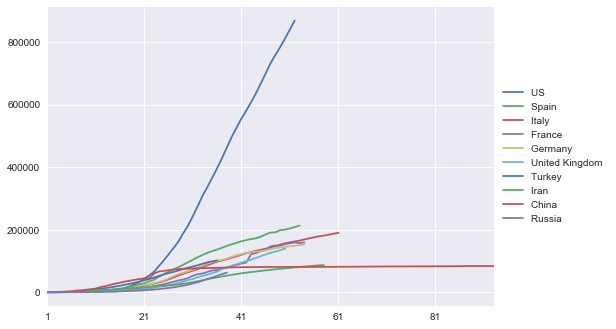

In [27]:
# Visualize the 15 countries with the highest number of infections (sorted ascendingly and select top 15)
visualize_timeseries(sort_according_to_number_of_infections(df_norm).head(10), False)

In order to compare the different curves, the idea is to find a measure describing the exponential growth which obviously starts directly after a detected outbreak. However, each curve shows after some specific timepoint a trend to a more linear growth. This might be the result of governmental measures, attitude changes of the population, and possible saturation effects of local outbreaks. A visualization with a logarithmic scale of the y-axis shows this much better.

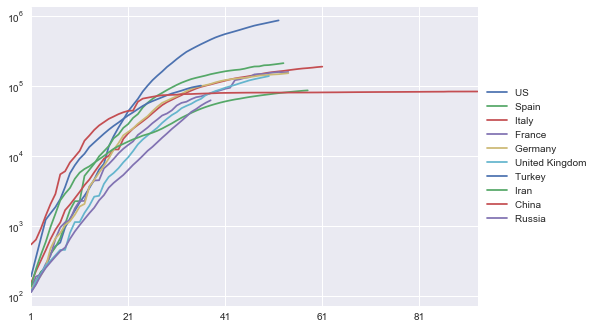

In [28]:
# Visualize the 15 countries with the highest number of infections (sorted ascendingly and select top 15) on a log-scale
visualize_timeseries(sort_according_to_number_of_infections(df_norm).head(10), True)

An important point to understand the differences in exponential growth of the curves is to find out at which timepoint this type of growth ends. An idea for this would be to take the timepoint at which the steepest increase takes place. After this point, the outbreak obviously looses speed. Mathematically, this point is the second derivative of the function describing the cumulative number of cases. Before calculating this, the data will be applied to a noise filter. The function for this filter is defined in the next step. Here a Savitzky-Golay filter is used which bases on a polynomial regression. It is less biased than a sliding window filter using the mean.

In [29]:
def savitzky_golay_filter(df):
    '''
    INPUT:
    df - pandas dataframe with timeseries
    
    OUTPUT:
    df - pandas dataframe which which is the filtered input dataframe
    
    Description:
    A Savitzky-Golay filter is used for the filtering
    '''

    # Create output dataframe
    df_output=df.copy()
    
    # Iterate over all rows
    for index, row in df_output.iterrows():
        
        # Create a list which is used to call the savgol_filter function
        value_list=[]
        
        # Iterate over all columns
        values_found=False
        for col_name, col_data in df_output.iteritems():
            if (col_name=='1' or values_found) and not(np.isnan(df_output.at[index, col_name])):
                if not(values_found):
                    values_found=True
                value_list.append(df_output.at[index, col_name]) # Add value to list
        
        # Call the savgol_filter function
        if len(value_list) >= 5:
            value_list=savgol_filter(value_list, 5, 2)

        # Create an iterator to itereate through the savgol_filter output
        value_liste_iterator=iter(value_list)
        
        # Iterate over all columns
        values_found=False
        for col_name, col_data in df_output.iteritems():
            if (col_name=='1' or values_found) and not(np.isnan(df_output.at[index, col_name])):
                if not(values_found):
                    values_found=True
                df_output.at[index, col_name]=next(value_liste_iterator) # Write output in output dataframe
                
    return df_output
    

In [30]:
# Create a dataframe as a filtered version of the normalized dataframe
df_norm_filtered=savitzky_golay_filter(df_norm)

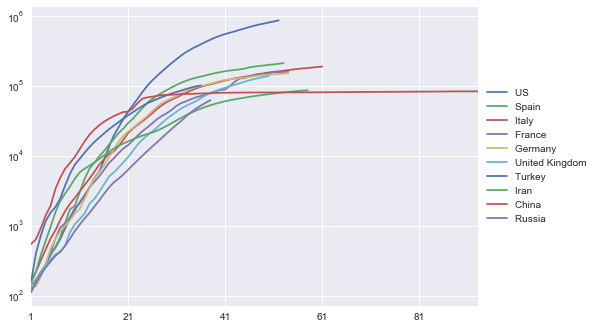

In [31]:
# Visualize in filtered data the 15 countries with the highest number of infections (sorted ascendingly and select top 15) on a log-scale
visualize_timeseries(sort_according_to_number_of_infections(df_norm_filtered).head(10), True)

### Country information dataset
Now, the countryinfo dataset is prepared. Also here it is required to remove rows to make it compatible with the timeseries dataset. In the first step, all US states are removed, since for these ones not data exist in the series, since in contains only a combined row for the US (from the beginning, not just after preprocessing).

In [32]:
df_countryinfo_reduced=df_countryinfo.copy()

# Replace NaNs by empty entries
df_countryinfo_reduced['region'].fillna("", inplace=True)

# Remove rows which are no longer required (since provinces/states have been combined in new rows)
df_countryinfo_reduced=df_countryinfo_reduced[df_countryinfo_reduced['region']=='']

# Sort according to country
df_countryinfo_reduced=df_countryinfo_reduced.sort_values(by='country')

# Reset the index (so that there are no gaps due to removed rows)
df_countryinfo_reduced=df_countryinfo_reduced.reset_index(drop=True)

df_countryinfo_reduced.head(20)

region              country alpha3code alpha2code          pop    tests  \
0                  Afghanistan        AFG         AF   38,928,346      NaN   
1                      Albania        ALB         AL    2,877,797      NaN   
2                      Algeria        DZA         DZ   43,851,044      NaN   
3                      Andorra        AND         AD       77,265      NaN   
4          Antigua and Barbuda        ATG         AG       97,929      NaN   
5                    Argentina        ARG         AR   45,195,774      NaN   
6                      Armenia        ARM         AM    2,963,243    694.0   
7                    Australia        AUS         AU   25,499,884  31635.0   
8                      Austria        AUT         AT    9,006,398  10278.0   
9                   Azerbaijan        AZE         AZ   10,139,177      NaN   
10                     Bahamas        BHS         BS      393,244      NaN   
11                     Bahrain        BHR         BH    1,701,575  13553.0   
12                  Bangladesh        BGD         BD  164,689,383      NaN   
13                    Barbados        BRB         BB      287,375      NaN   
14                     Belarus        BLR         BY    9,449,323  16000.0   
15                     Belgium        BEL         BE   11,589,623   4225.0   
16                      Belize        BLZ         BZ      397,628      NaN   
17                       Benin        BEN         BJ   12,123,200      NaN   
18                      Bhutan        BTN         BT      771,608      NaN   
19                     Bolivia        BOL         BO   11,673,021      NaN   

        testpop  density  medianage  urbanpop quarantine schools publicplace  \
0           NaN     60.0       18.0      25.0        NaN     NaN         NaN   
1           NaN    105.0       36.0      63.0        NaN     NaN         NaN   
2           NaN     18.0       29.0      73.0        NaN     NaN         NaN   
3           NaN    164.0       45.0      88.0        NaN     NaN         NaN   
4           NaN    223.0       34.0      26.0        NaN     NaN         NaN   
5           NaN     17.0       32.0      93.0  3/20/2020     NaN         NaN   
6   4269.802594    104.0       35.0      63.0        NaN     NaN         NaN   
7    806.065560      3.0       38.0      86.0        NaN     NaN   3/23/2020   
8    876.279237    109.0       43.0      57.0  3/16/2020     NaN         NaN   
9           NaN    123.0       32.0      56.0        NaN     NaN         NaN   
10          NaN     39.0       32.0      86.0        NaN     NaN         NaN   
11   125.549694   2239.0       32.0      89.0        NaN     NaN         NaN   
12          NaN   1265.0       28.0      39.0        NaN     NaN         NaN   
13          NaN    668.0       40.0      31.0        NaN     NaN         NaN   
14   590.582688     47.0       40.0      79.0        NaN     NaN         NaN   
15  2743.106036    383.0       42.0      98.0  3/18/2020     NaN         NaN   
16          NaN     17.0       24.0      46.0        NaN     NaN         NaN   
17          NaN    108.0       19.0      48.0        NaN     NaN         NaN   
18          NaN     20.0       28.0      46.0        NaN     NaN         NaN   
19          NaN     11.0       26.0      69.0        NaN     NaN         NaN   

    gatheringlimit  gathering nonessential  hospibed  smokers  sex0  sex14  \
0              NaN        NaN          NaN       0.5      NaN  1.05   1.03   
1              NaN        NaN          NaN       2.9    29.40  1.08   1.11   
2              NaN        NaN          NaN       1.9      NaN  1.05   1.05   
3              NaN        NaN          NaN       2.5    32.50  1.07   1.05   
4              NaN        NaN          NaN       3.8      NaN  1.05   1.03   
5              NaN        NaN          NaN       5.0    23.95  1.05   1.06   
6              NaN        NaN          NaN       4.2    26.90  1.13   1.14   
7              2.0  3/29/2020          NaN       3.8    14.

In the next step, the columns that are not automatically interpreted as numbers are converted.

In [33]:
# Replace the comma-delimiter which lead to a wrong interpretation of the columns 
df_countryinfo_reduced['pop'] = df_countryinfo_reduced['pop'].str.replace(',', '')
df_countryinfo_reduced['gdp2019'] = df_countryinfo_reduced['gdp2019'].str.replace(',', '')

In [34]:
# Convert cells into numbers
df_countryinfo_reduced['pop'] = df_countryinfo_reduced['pop'].astype('float64')
df_countryinfo_reduced['gdp2019'] = df_countryinfo_reduced['gdp2019'].astype('float64')

In [35]:
df_countryinfo_reduced.rename(columns={'country': 'Country'}, inplace=True)
df_countryinfo_reduced.head(20)

region              Country alpha3code alpha2code          pop    tests  \
0                  Afghanistan        AFG         AF   38928346.0      NaN   
1                      Albania        ALB         AL    2877797.0      NaN   
2                      Algeria        DZA         DZ   43851044.0      NaN   
3                      Andorra        AND         AD      77265.0      NaN   
4          Antigua and Barbuda        ATG         AG      97929.0      NaN   
5                    Argentina        ARG         AR   45195774.0      NaN   
6                      Armenia        ARM         AM    2963243.0    694.0   
7                    Australia        AUS         AU   25499884.0  31635.0   
8                      Austria        AUT         AT    9006398.0  10278.0   
9                   Azerbaijan        AZE         AZ   10139177.0      NaN   
10                     Bahamas        BHS         BS     393244.0      NaN   
11                     Bahrain        BHR         BH    1701575.0  13553.0   
12                  Bangladesh        BGD         BD  164689383.0      NaN   
13                    Barbados        BRB         BB     287375.0      NaN   
14                     Belarus        BLR         BY    9449323.0  16000.0   
15                     Belgium        BEL         BE   11589623.0   4225.0   
16                      Belize        BLZ         BZ     397628.0      NaN   
17                       Benin        BEN         BJ   12123200.0      NaN   
18                      Bhutan        BTN         BT     771608.0      NaN   
19                     Bolivia        BOL         BO   11673021.0      NaN   

        testpop  density  medianage  urbanpop quarantine schools publicplace  \
0           NaN     60.0       18.0      25.0        NaN     NaN         NaN   
1           NaN    105.0       36.0      63.0        NaN     NaN         NaN   
2           NaN     18.0       29.0      73.0        NaN     NaN         NaN   
3           NaN    164.0       45.0      88.0        NaN     NaN         NaN   
4           NaN    223.0       34.0      26.0        NaN     NaN         NaN   
5           NaN     17.0       32.0      93.0  3/20/2020     NaN         NaN   
6   4269.802594    104.0       35.0      63.0        NaN     NaN         NaN   
7    806.065560      3.0       38.0      86.0        NaN     NaN   3/23/2020   
8    876.279237    109.0       43.0      57.0  3/16/2020     NaN         NaN   
9           NaN    123.0       32.0      56.0        NaN     NaN         NaN   
10          NaN     39.0       32.0      86.0        NaN     NaN         NaN   
11   125.549694   2239.0       32.0      89.0        NaN     NaN         NaN   
12          NaN   1265.0       28.0      39.0        NaN     NaN         NaN   
13          NaN    668.0       40.0      31.0        NaN     NaN         NaN   
14   590.582688     47.0       40.0      79.0        NaN     NaN         NaN   
15  2743.106036    383.0       42.0      98.0  3/18/2020     NaN         NaN   
16          NaN     17.0       24.0      46.0        NaN     NaN         NaN   
17          NaN    108.0       19.0      48.0        NaN     NaN         NaN   
18          NaN     20.0       28.0      46.0        NaN     NaN         NaN   
19          NaN     11.0       26.0      69.0        NaN     NaN         NaN   

    gatheringlimit  gathering nonessential  hospibed  smokers  sex0  sex14  \
0              NaN        NaN          NaN       0.5      NaN  1.05   1.03   
1              NaN        NaN          NaN       2.9    29.40  1.08   1.11   
2              NaN        NaN          NaN       1.9      NaN  1.05   1.05   
3              NaN        NaN          NaN       2.5    32.50  1.07   1.05   
4              NaN        NaN          NaN       3.8      NaN  1.05   1.03   
5              NaN        NaN          NaN       5.0    23.95  1.05   1.06   
6              NaN        NaN          NaN       4.2    26.90  1.13   1.14   
7              2.0  3/29/2020          NaN       3.8    14.

### Merge datasets

In [36]:
# Change column name before merging (merged dataframes neend an identical column)
df_norm_filtered.rename(columns={'Country/Region': 'Country'}, inplace=True)
df_norm_filtered.head()

Province/State      Country      Lat     Long  Infections Outbreak_Start  \
0                 Afghanistan  33.0000  65.0000        1279        3/27/20   
1                     Albania  41.1533  20.1683         663        3/23/20   
2                     Algeria  28.0339   1.6596        3007        3/21/20   
3                     Andorra  42.5063   1.5218         723        3/22/20   
4                      Angola -11.2027  17.8739          25                  

            1           2           3           4           5           6  \
0  106.057143  114.571429  129.942857  153.628571  190.371429  229.714286   
1  102.314286  125.742857  147.885714  170.914286  186.857143  198.114286   
2  143.257143  191.371429  233.342857  261.942857  308.257143  360.485714   
3  112.571429  134.914286  160.828571  190.057143  224.342857  267.342857   
4         NaN         NaN         NaN         NaN         NaN         NaN   

            7           8           9          10          11          12  \
0  269.657143  282.371429  306.371429  337.514286  379.257143  412.114286   
1  210.200000  225.228571  241.371429  258.914286  278.200000  303.657143   
2  410.457143  454.428571  507.657143  592.828571  710.085714  844.514286   
3  304.742857  339.571429  363.314286  377.885714  395.742857  419.942857   
4         NaN         NaN         NaN         NaN         NaN         NaN   

            13           14           15           16           17  \
0   450.514286   482.114286   519.200000   557.828571   607.257143   
1   333.685714   359.885714   375.371429   386.428571   397.857143   
2  1002.200000  1150.000000  1255.200000  1331.742857  1405.085714   
3   443.371429   466.942857   498.771429   525.342857   545.171429   
4          NaN          NaN          NaN          NaN          NaN   

            18           19           20           21           22  \
0   661.142857   719.571429   778.942857   846.257143   895.371429   
1   408.485714   418.228571   430.771429   448.828571   463.142857   
2  1483.942857  1565.142857  1669.685714  1753.457143  1833.657143   
3   564.171429   584.371429   594.828571   611.371429   629.428571   
4          NaN          NaN          NaN          NaN          NaN   

            23           24           25           26           27  \
0   945.342857   984.171429  1033.457143  1090.371429  1173.685714   
1   477.571429   494.171429   518.085714   536.771429   549.200000   
2  1906.885714  1987.542857  2067.428571  2159.228571  2276.571429   
3   649.257143   659.942857   668.542857   679.428571   691.371429   
4          NaN          NaN          NaN          NaN          NaN   

            28           29           30           31           32  \
0  1280.428571          NaN          NaN          NaN          NaN   
1   562.685714   583.828571   608.400000   634.600000   662.800000   
2  2410.371429  2533.828571  2629.428571  2718.685714  2811.857143   
3   705.885714   712.400000   716.228571   718.885714   721.342857   
4          NaN          NaN          NaN          NaN          NaN   

            33           34  35  36  37  38  39  40  41  42  43  44  45  46  \
0          NaN          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1          NaN          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2  2908.228571  3007.742857 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3   723.514286          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4          NaN          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  \
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N

In [37]:
df_all = pd.merge(df_countryinfo_reduced, df_norm_filtered , on='Country', how='inner')

In [38]:
# Remove unused columns for region and Province/State
del df_all['region']
del df_all['Province/State']

In [39]:
df_all.head(20)

Country alpha3code alpha2code          pop    tests  \
0           Afghanistan        AFG         AF   38928346.0      NaN   
1               Albania        ALB         AL    2877797.0      NaN   
2               Algeria        DZA         DZ   43851044.0      NaN   
3               Andorra        AND         AD      77265.0      NaN   
4   Antigua and Barbuda        ATG         AG      97929.0      NaN   
5             Argentina        ARG         AR   45195774.0      NaN   
6               Armenia        ARM         AM    2963243.0    694.0   
7             Australia        AUS         AU   25499884.0  31635.0   
8               Austria        AUT         AT    9006398.0  10278.0   
9            Azerbaijan        AZE         AZ   10139177.0      NaN   
10              Bahamas        BHS         BS     393244.0      NaN   
11              Bahrain        BHR         BH    1701575.0  13553.0   
12           Bangladesh        BGD         BD  164689383.0      NaN   
13             Barbados        BRB         BB     287375.0      NaN   
14              Belarus        BLR         BY    9449323.0  16000.0   
15              Belgium        BEL         BE   11589623.0   4225.0   
16               Belize        BLZ         BZ     397628.0      NaN   
17                Benin        BEN         BJ   12123200.0      NaN   
18               Bhutan        BTN         BT     771608.0      NaN   
19              Bolivia        BOL         BO   11673021.0      NaN   

        testpop  density  medianage  urbanpop quarantine schools publicplace  \
0           NaN     60.0       18.0      25.0        NaN     NaN         NaN   
1           NaN    105.0       36.0      63.0        NaN     NaN         NaN   
2           NaN     18.0       29.0      73.0        NaN     NaN         NaN   
3           NaN    164.0       45.0      88.0        NaN     NaN         NaN   
4           NaN    223.0       34.0      26.0        NaN     NaN         NaN   
5           NaN     17.0       32.0      93.0  3/20/2020     NaN         NaN   
6   4269.802594    104.0       35.0      63.0        NaN     NaN         NaN   
7    806.065560      3.0       38.0      86.0        NaN     NaN   3/23/2020   
8    876.279237    109.0       43.0      57.0  3/16/2020     NaN         NaN   
9           NaN    123.0       32.0      56.0        NaN     NaN         NaN   
10          NaN     39.0       32.0      86.0        NaN     NaN         NaN   
11   125.549694   2239.0       32.0      89.0        NaN     NaN         NaN   
12          NaN   1265.0       28.0      39.0        NaN     NaN         NaN   
13          NaN    668.0       40.0      31.0        NaN     NaN         NaN   
14   590.582688     47.0       40.0      79.0        NaN     NaN         NaN   
15  2743.106036    383.0       42.0      98.0  3/18/2020     NaN         NaN   
16          NaN     17.0       24.0      46.0        NaN     NaN         NaN   
17          NaN    108.0       19.0      48.0        NaN     NaN         NaN   
18          NaN     20.0       28.0      46.0        NaN     NaN         NaN   
19          NaN     11.0       26.0      69.0        NaN     NaN         NaN   

    gatheringlimit  gathering nonessential  hospibed  smokers  sex0  sex14  \
0              NaN        NaN          NaN       0.5      NaN  1.05   1.03   
1              NaN        NaN          NaN       2.9    29.40  1.08   1.11   
2              NaN        NaN          NaN       1.9      NaN  1.05   1.05   
3              NaN        NaN          NaN       2.5    32.50  1.07   1.05   
4              NaN        NaN          NaN       3.8      NaN  1.05   1.03   
5              NaN        NaN          NaN       5.0    23.95  1.05   1.06   
6              NaN        NaN          NaN       4.2    26.90  1.13   1.14   
7              2.0  3/29/2020          NaN       3.8    14.90  1.06   1.06   
8              NaN        NaN          NaN       7.6    35.15  1.05   1.05   
9              NaN        NaN          NaN       4.7    23.45  

In the last data preprocessing step, the dates in the measure columns are replaced by integer values. The idea behind is that a machine learning method can then easier use the single measures as features to predict the overall effect of measures. 

In [40]:
def calc_diff_between_outbreak_and_measure(df, measure, penality):
    '''
    INPUT:
    df_norm - pandas dataframe with the complete data set
    measure - name of the column that should be converted into a difference of days
    penality - penality value if there is just a nan
    
    Description:
    Converts the date at which a measure has been started into the difference of days 
    between the outbreak in the specifc country (corresponding to the row) and the date the mesure has been started.
    If the measure does not exist (NaN), a penalty value is added.
    '''

    df_output=df.copy()
    
    df_output[measure].fillna("", inplace=True)
    
    # Iterate over all rows
    for index, row in df_all.iterrows():
        # If there is a NaN (no measure took place) or there was no significant outbreak start
        # which will later be not considered, add penality costs
        if df_output.at[index, measure]=='' or df_output.at[index, 'Outbreak_Start']=='':
            df_output.at[index, measure]=int(penality)
        else:
            # Get the string of outbreak start and convert it to the date format
            date_outbreak_string=str(df_output.at[index, 'Outbreak_Start']).split("/")
            date_outbreak=date(int(date_outbreak_string[2])+2000, int(date_outbreak_string[0]), int(date_outbreak_string[1]))

            # Get the string of measure start and convert it to the date format
            date_measure_string=str(df_output.at[index, measure]).split("/")
            date_measure=date(int(date_measure_string[2]), int(date_measure_string[0]), int(date_measure_string[1]))        

            # Calculate the days between outbreak start and start of the measure and add it to the output dataframe
            df_output.at[index, measure]=(date_measure-date_outbreak).days

    return df_output # Return output dataframe


In [41]:
# Use calc_diff_between_outbreak_and_measure function to calculate days between outbreak start and start of measure
penality = 1000
df_all=calc_diff_between_outbreak_and_measure(df_all, 'quarantine', penality)
df_all=calc_diff_between_outbreak_and_measure(df_all, 'schools', penality)
df_all=calc_diff_between_outbreak_and_measure(df_all, 'publicplace', penality)
df_all=calc_diff_between_outbreak_and_measure(df_all, 'gathering', penality)
df_all=calc_diff_between_outbreak_and_measure(df_all, 'nonessential', penality)

In [42]:
df_all.head(200)

Country alpha3code alpha2code           pop  \
0                         Afghanistan        AFG         AF  3.892835e+07   
1                             Albania        ALB         AL  2.877797e+06   
2                             Algeria        DZA         DZ  4.385104e+07   
3                             Andorra        AND         AD  7.726500e+04   
4                 Antigua and Barbuda        ATG         AG  9.792900e+04   
5                           Argentina        ARG         AR  4.519577e+07   
6                             Armenia        ARM         AM  2.963243e+06   
7                           Australia        AUS         AU  2.549988e+07   
8                             Austria        AUT         AT  9.006398e+06   
9                          Azerbaijan        AZE         AZ  1.013918e+07   
10                            Bahamas        BHS         BS  3.932440e+05   
11                            Bahrain        BHR         BH  1.701575e+06   
12                         Bangladesh        BGD         BD  1.646894e+08   
13                           Barbados        BRB         BB  2.873750e+05   
14                            Belarus        BLR         BY  9.449323e+06   
15                            Belgium        BEL         BE  1.158962e+07   
16                             Belize        BLZ         BZ  3.976280e+05   
17                              Benin        BEN         BJ  1.212320e+07   
18                             Bhutan        BTN         BT  7.716080e+05   
19                            Bolivia        BOL         BO  1.167302e+07   
20             Bosnia and Herzegovina        BIH         BA  3.280819e+06   
21                             Brazil        BRA         BR  2.125594e+08   
22                             Brunei        BRN         BN  4.374790e+05   
23                           Bulgaria        BGR         BG  6.948445e+06   
24                       Burkina Faso        BFA         BF  2.090327e+07   
25                         Cabo Verde        CPV         CV  5.544410e+05   
26                           Cambodia        KHM         KH  1.671896e+07   
27                           Cameroon        CMR         CM  2.654586e+07   
28                             Canada        CAN         CA  3.774215e+07   
29           Central African Republic        CAF         CF  3.774215e+07   
30                               Chad        TDC         TD  1.630270e+07   
31                              Chile        CHL         CN  1.911620e+07   
32                              China        CHN         CN  1.439324e+09   
33                           Colombia        COL         CO  5.088289e+07   
34                Congo (Brazzaville)        COG         CG  5.518087e+06   
35                   Congo (Kinshasa)        COG         CG  8.956140e+07   
36                         Costa Rica        CRI         CR  5.094118e+06   
37                      Cote d'Ivoire        CIV         CI  2.637827e+07   
38                            Croatia        HRV         HR  4.105267e+06   
39                               Cuba        CUB         CU  1.132662e+07   
40                             Cyprus        CYP         CY  1.207359e+06   
41                            Czechia        CZE         CZ  1.070898e+07   
42                            Denmark        DNK         DK  5.792202e+06   
43                   Diamond Princess        NaN        NaN  3.500000e+03   
44                           Djibouti        DJI         DJ  9.880000e+05   
45                           Dominica        DMA         DM  7.198600e+04   
46                 Dominican Republic        DOM         DO  1.084791e+07   
47                            Ecuador        ECU         EC  1.764305e+07   
48                              Egypt        EGY         EG  1.023344e+08   
49                        El Salvador        SLV         SV  6.486205e+06   
50                  Equatorial Guinea        GNQ         GQ  1.402985e+06   
51                        

## 4. Modelling and Evaluation
### A simple model for the spread of a virus epidemic
### Calculation of the derivative

The next step is to calculate the derivatives. A derivative of a function describes the slope of the function. Applied to the cumulative growth of the Corona cases, the first derivative is simply the number of new detected cases per day. This is done in the following function. If the function is applied twice, the second derivative is calculated.

In [43]:
def derivative(df):
    '''
    INPUT:
    df - pandas dataframe with timeseries
    
    OUTPUT:
    df - pandas dataframe which represents a derivative of the input dataframe
    
    Description:
    In the derivative for a timeseries, datapoint x is the differences of point x and x-1 from the input array.
    '''

    # Create output dataframe
    df_output=df.copy()
    
    # Iterate over all rows
    for index, row in df.iterrows():
    
        # Iterate over all columns
        values_found=False
        increase=0
        last_col_name=0
        for col_name, col_data in df.iteritems():
            if col_name=='1' or values_found:
                if not(values_found):
                    values_found=True
                if last_col_name != 0:
                    # Caluculate the difference of the current column and the last one (at current row)
                    df_output.at[index, col_name]=df.at[index, col_name]-df.at[index, last_col_name]
                    last_col_name=col_name
                else:
                    df_output.at[index, col_name]=0
                    last_col_name=col_name        
    return df_output


In [44]:
df_all_derivative=derivative(df_all)

In [45]:
df_all_derivative.head()

Country alpha3code alpha2code         pop  tests  testpop  \
0          Afghanistan        AFG         AF  38928346.0    NaN      NaN   
1              Albania        ALB         AL   2877797.0    NaN      NaN   
2              Algeria        DZA         DZ  43851044.0    NaN      NaN   
3              Andorra        AND         AD     77265.0    NaN      NaN   
4  Antigua and Barbuda        ATG         AG     97929.0    NaN      NaN   

   density  medianage  urbanpop quarantine schools publicplace  \
0     60.0       18.0      25.0       1000    1000        1000   
1    105.0       36.0      63.0       1000    1000        1000   
2     18.0       29.0      73.0       1000    1000        1000   
3    164.0       45.0      88.0       1000    1000        1000   
4    223.0       34.0      26.0       1000    1000        1000   

   gatheringlimit gathering nonessential  hospibed  smokers  sex0  sex14  \
0             NaN      1000         1000       0.5      NaN  1.05   1.03   
1             NaN      1000         1000       2.9     29.4  1.08   1.11   
2             NaN      1000         1000       1.9      NaN  1.05   1.05   
3             NaN      1000         1000       2.5     32.5  1.07   1.05   
4             NaN      1000         1000       3.8      NaN  1.05   1.03   

   sex25  sex54  sex64  sex65plus  sexratio   lung  femalelung  malelung  \
0   1.03   1.03   0.97       0.85      1.03  37.62       36.31     39.33   
1   1.09   0.93   0.95       0.87      0.98  11.67        7.02     17.04   
2   1.05   1.03   1.01       0.89      1.03   8.77        5.03     12.81   
3   1.08   1.05   1.15       1.02      1.06    NaN         NaN       NaN   
4   0.99   0.84   0.82       0.76      0.90  11.76        7.67     18.78   

    gdp2019 healthexp  healthperpop  fertility    avgtemp  avghumidity  \
0   18734.0       184      4.726633       5.12   6.216667    56.933333   
1   15418.0       774    268.955733       1.51  13.950000    69.900000   
2  172781.0     1,031     23.511413       2.70  19.566667    61.716667   
3   91527.0     5,949  76994.758300       1.40   7.383333    75.233333   
4    1688.0     1,105  11283.685120       2.00        NaN          NaN   

   firstcase totalcases active30 active31 active1 active2 active3 newcases30  \
0  2/23/2020        273      139      165     187     225     257         25   
1   3/7/2020        304      168      176     177     194     199         11   
2  2/24/2020        986      449      626     728     728     839        NaN   
3   3/1/2020        439      322      352     366     403     407        NaN   
4  3/12/2020          9        7        7       7       7       9        NaN   

  newcases31 newcases1 newcases2 newcases3 deaths  newdeaths30  newdeaths31  \
0          4        22         2       NaN      6          NaN          NaN   
1         20        16        18        27     16          1.0          4.0   
2        132       131       NaN       NaN     86          NaN          9.0   
3        NaN        14        38        11     16          NaN          NaN   
4        NaN       NaN       NaN       NaN    NaN          NaN          NaN   

   newdeaths1  newdeaths2  newdeaths3 recovered critical30 critical31  \
0         NaN         NaN         NaN        10        NaN        NaN   
1         NaN         1.0         NaN        89          7          8   
2        14.0         NaN         NaN        61        NaN        NaN   
3         2.0         1.0         1.0        16         10         10   
4         NaN         NaN         NaN       NaN        NaN        NaN   

  critical1 critical2 critical3 casediv1m  deathdiv1m      Lat     Long  \
0       NaN       NaN       NaN         7         0.2  33.0000  65.0000   
1         7         7         7       106         6.0  41.1533  20.1683   
2       NaN       NaN       NaN        22         2.0  28.0339   1.6596   
3        12        12        12     5,682       207.0  42.5063   1.5218   
4       NaN       NaN       NaN 

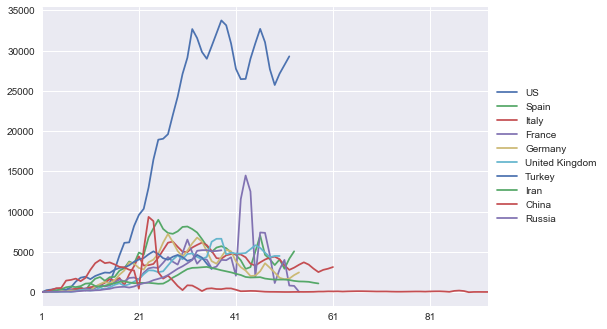

In [46]:
# Visualize the 1st derivative of 15 countries with the highest number of infections
visualize_timeseries(sort_according_to_number_of_infections(df_all_derivative).head(10), False)

Some of the derivatives seem to show cyclic fluctuations on a weekly base. A reason might be that new cases on weekend are reported with delay to the health authorities. Thus, a median filter with a width of 7 (for 7 days per week) is applied to the derivatives before the next step. The filter is implemented in the following function:

In [47]:
def median_filter(df):
    '''
    INPUT:
    df - pandas dataframe with timeseries
    
    OUTPUT:
    df - pandas dataframe which which is the filtered input dataframe
    
    Description:
    A Savitzky-Golay filter is used for the filtering
    '''

    # Create output dataframe
    df_output=df.copy()
    
    # Iterate over all rows
    for index, row in df_output.iterrows():
        
        # Create a list which is used to call the savgol_filter function
        value_list=[]
        
        # Iterate over all columns
        values_found=False 
        for col_name, col_data in df_output.iteritems():
            if (col_name=='1' or values_found) and not(np.isnan(df_output.at[index, col_name])):
                if not(values_found):
                    values_found=True
                value_list.append(df_output.at[index, col_name]) # Add value to list
        
        # Call the savgol_filter function
        if len(value_list) >= 5:
            value_list=medfilt(value_list, 7)

        # Create an iterator to itereate through the savgol_filter output
        value_liste_iterator=iter(value_list)
        
        # Iterate over all columns
        values_found=False 
        for col_name, col_data in df_output.iteritems():
            if (col_name=='1' or values_found) and not(np.isnan(df_output.at[index, col_name])):
                if not(values_found):
                    values_found=True
                df_output.at[index, col_name]=next(value_liste_iterator) # Write output in output dataframe
                
    return df_output # Return output dataset

In [48]:
# Apply median filter to compensate that new cases on weekend are reported with delay to the health authorities
df_all_derivative_filtered=median_filter(df_all_derivative)

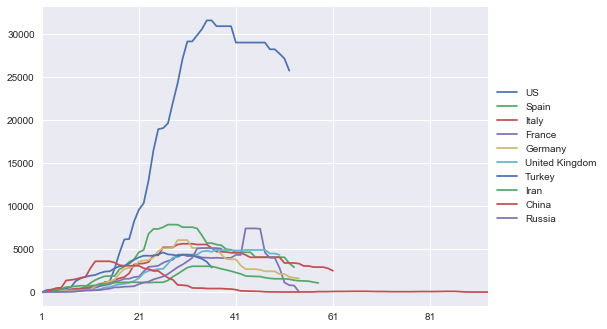

In [49]:
# Visualize the 1st derivative of 15 countries with the highest number of infections
visualize_timeseries(sort_according_to_number_of_infections(df_all_derivative_filtered).head(10), False)

In [50]:
# Apply the Savitzky-Golay filter on the derivative
df_all_derivative_filtered=savitzky_golay_filter(df_all_derivative_filtered)

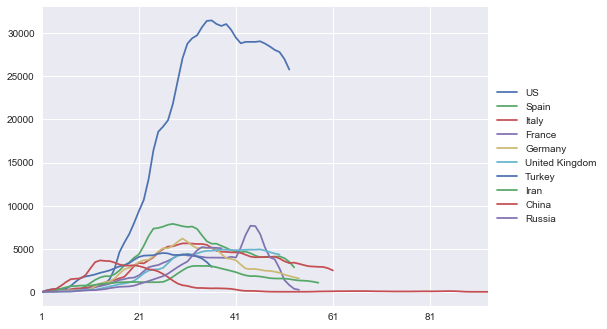

In [51]:
# Visualize the 1st derivative of 15 countries with the highest number of infections
visualize_timeseries(sort_according_to_number_of_infections(df_all_derivative_filtered).head(10), False)

In [52]:
# Calculate the 2nd derivative
df_all_2nd_derivative_filtered=derivative(df_all_derivative_filtered)

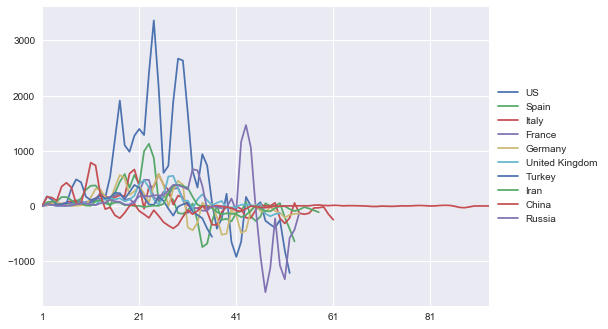

In [53]:
# Visualize the 2nd derivative of 15 countries with the highest number of infections
visualize_timeseries(sort_according_to_number_of_infections(df_all_2nd_derivative_filtered).head(10), False)

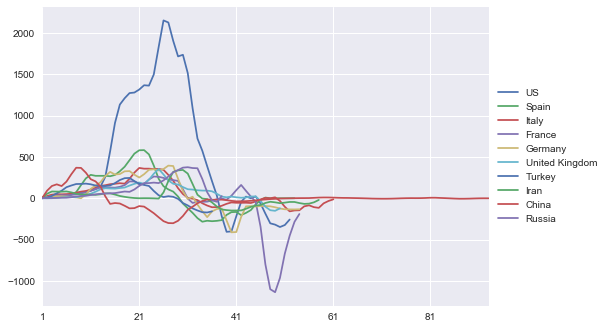

In [54]:
# RAUSNEHMEN
df_superfiltered=median_filter(df_all_2nd_derivative_filtered)
df_superfiltered=savitzky_golay_filter(df_superfiltered)
visualize_timeseries(sort_according_to_number_of_infections(df_superfiltered).head(10), False)

In the next step a function is implemented which calculates the maximum of each row value. Applied to the second derivative, it is the already mentioned point of steepest increase of case numbers.

In [55]:
def add_max_value_and_index(df):
    '''
    INPUT:
    df - pandas dataframe with timeseries
    
    OUTPUT:
    df - input dataframe extended by max value and max index columns
    
    Description:
    Adds two columns
    '''

    df_output=df.copy()
    df_output['Max_Value'] = 0
    df_output['Max_Index'] = 0
    
    # Sort according to the number of infections
    # Iterate over all rows in df and fill the user item data frame
    for index, row in df.iterrows():
        
        value_list=[]
        
        # Iterate over all columns
        values_found=False
        for col_name, col_data in df.iteritems():
            if (col_name=='1' or values_found) and not(np.isnan(df_output.at[index, col_name])):
                if not(values_found):
                    values_found=True
                value_list.append(df_output.at[index, col_name])

        max_value = max(value_list)
        max_index = value_list.index(max_value)
        
        df_output.at[index, 'Max_Value'] = max_value
        df_output.at[index, 'Max_Index'] = max_index

    return df_output

In [56]:
# Apply the function to get the max value and the corresponding index and add both to the dataframe
df_all_2nd_derivative_filtered=add_max_value_and_index(df_all_2nd_derivative_filtered)

In [57]:
df_all_2nd_derivative_filtered.head(200)

Country alpha3code alpha2code           pop  \
0                         Afghanistan        AFG         AF  3.892835e+07   
1                             Albania        ALB         AL  2.877797e+06   
2                             Algeria        DZA         DZ  4.385104e+07   
3                             Andorra        AND         AD  7.726500e+04   
4                 Antigua and Barbuda        ATG         AG  9.792900e+04   
5                           Argentina        ARG         AR  4.519577e+07   
6                             Armenia        ARM         AM  2.963243e+06   
7                           Australia        AUS         AU  2.549988e+07   
8                             Austria        AUT         AT  9.006398e+06   
9                          Azerbaijan        AZE         AZ  1.013918e+07   
10                            Bahamas        BHS         BS  3.932440e+05   
11                            Bahrain        BHR         BH  1.701575e+06   
12                         Bangladesh        BGD         BD  1.646894e+08   
13                           Barbados        BRB         BB  2.873750e+05   
14                            Belarus        BLR         BY  9.449323e+06   
15                            Belgium        BEL         BE  1.158962e+07   
16                             Belize        BLZ         BZ  3.976280e+05   
17                              Benin        BEN         BJ  1.212320e+07   
18                             Bhutan        BTN         BT  7.716080e+05   
19                            Bolivia        BOL         BO  1.167302e+07   
20             Bosnia and Herzegovina        BIH         BA  3.280819e+06   
21                             Brazil        BRA         BR  2.125594e+08   
22                             Brunei        BRN         BN  4.374790e+05   
23                           Bulgaria        BGR         BG  6.948445e+06   
24                       Burkina Faso        BFA         BF  2.090327e+07   
25                         Cabo Verde        CPV         CV  5.544410e+05   
26                           Cambodia        KHM         KH  1.671896e+07   
27                           Cameroon        CMR         CM  2.654586e+07   
28                             Canada        CAN         CA  3.774215e+07   
29           Central African Republic        CAF         CF  3.774215e+07   
30                               Chad        TDC         TD  1.630270e+07   
31                              Chile        CHL         CN  1.911620e+07   
32                              China        CHN         CN  1.439324e+09   
33                           Colombia        COL         CO  5.088289e+07   
34                Congo (Brazzaville)        COG         CG  5.518087e+06   
35                   Congo (Kinshasa)        COG         CG  8.956140e+07   
36                         Costa Rica        CRI         CR  5.094118e+06   
37                      Cote d'Ivoire        CIV         CI  2.637827e+07   
38                            Croatia        HRV         HR  4.105267e+06   
39                               Cuba        CUB         CU  1.132662e+07   
40                             Cyprus        CYP         CY  1.207359e+06   
41                            Czechia        CZE         CZ  1.070898e+07   
42                            Denmark        DNK         DK  5.792202e+06   
43                   Diamond Princess        NaN        NaN  3.500000e+03   
44                           Djibouti        DJI         DJ  9.880000e+05   
45                           Dominica        DMA         DM  7.198600e+04   
46                 Dominican Republic        DOM         DO  1.084791e+07   
47                            Ecuador        ECU         EC  1.764305e+07   
48                              Egypt        EGY         EG  1.023344e+08   
49                        El Salvador        SLV         SV  6.486205e+06   
50                  Equatorial Guinea        GNQ         GQ  1.402985e+06   
51                        

After finding out the value of the steepest slope in the growth curve, it shall also be checked whether there is a measure to compare effects of mitigations against the disease. This is of course not easy since the disease is still spreading. However, here the following criterion shall be checked: At some point after the maximal growth, the increase becomes slower and the number of additional cases per days decreases. At some point, the maximal number of additional cases per day is reached. This is exactly covered by the maximum of the first derivative. The question is now, how fast this point is reached. Obviously, the faster this goes, the better might be the measures. However, also other effects might play a role here.

In [58]:
# Apply the function to get the max value and the corresponding index and add both to the dataframe
df_all_derivative=add_max_value_and_index(df_all_derivative)

In [59]:
df_all_derivative.head(200)

Country alpha3code alpha2code           pop  \
0                         Afghanistan        AFG         AF  3.892835e+07   
1                             Albania        ALB         AL  2.877797e+06   
2                             Algeria        DZA         DZ  4.385104e+07   
3                             Andorra        AND         AD  7.726500e+04   
4                 Antigua and Barbuda        ATG         AG  9.792900e+04   
5                           Argentina        ARG         AR  4.519577e+07   
6                             Armenia        ARM         AM  2.963243e+06   
7                           Australia        AUS         AU  2.549988e+07   
8                             Austria        AUT         AT  9.006398e+06   
9                          Azerbaijan        AZE         AZ  1.013918e+07   
10                            Bahamas        BHS         BS  3.932440e+05   
11                            Bahrain        BHR         BH  1.701575e+06   
12                         Bangladesh        BGD         BD  1.646894e+08   
13                           Barbados        BRB         BB  2.873750e+05   
14                            Belarus        BLR         BY  9.449323e+06   
15                            Belgium        BEL         BE  1.158962e+07   
16                             Belize        BLZ         BZ  3.976280e+05   
17                              Benin        BEN         BJ  1.212320e+07   
18                             Bhutan        BTN         BT  7.716080e+05   
19                            Bolivia        BOL         BO  1.167302e+07   
20             Bosnia and Herzegovina        BIH         BA  3.280819e+06   
21                             Brazil        BRA         BR  2.125594e+08   
22                             Brunei        BRN         BN  4.374790e+05   
23                           Bulgaria        BGR         BG  6.948445e+06   
24                       Burkina Faso        BFA         BF  2.090327e+07   
25                         Cabo Verde        CPV         CV  5.544410e+05   
26                           Cambodia        KHM         KH  1.671896e+07   
27                           Cameroon        CMR         CM  2.654586e+07   
28                             Canada        CAN         CA  3.774215e+07   
29           Central African Republic        CAF         CF  3.774215e+07   
30                               Chad        TDC         TD  1.630270e+07   
31                              Chile        CHL         CN  1.911620e+07   
32                              China        CHN         CN  1.439324e+09   
33                           Colombia        COL         CO  5.088289e+07   
34                Congo (Brazzaville)        COG         CG  5.518087e+06   
35                   Congo (Kinshasa)        COG         CG  8.956140e+07   
36                         Costa Rica        CRI         CR  5.094118e+06   
37                      Cote d'Ivoire        CIV         CI  2.637827e+07   
38                            Croatia        HRV         HR  4.105267e+06   
39                               Cuba        CUB         CU  1.132662e+07   
40                             Cyprus        CYP         CY  1.207359e+06   
41                            Czechia        CZE         CZ  1.070898e+07   
42                            Denmark        DNK         DK  5.792202e+06   
43                   Diamond Princess        NaN        NaN  3.500000e+03   
44                           Djibouti        DJI         DJ  9.880000e+05   
45                           Dominica        DMA         DM  7.198600e+04   
46                 Dominican Republic        DOM         DO  1.084791e+07   
47                            Ecuador        ECU         EC  1.764305e+07   
48                              Egypt        EGY         EG  1.023344e+08   
49                        El Salvador        SLV         SV  6.486205e+06   
50                  Equatorial Guinea        GNQ         GQ  1.402985e+06   
51                        

With the previously calculated maximum values it is now possible to derive measures to compare growth and effect of measures between different countries. For this, the following two functions are used.

In [60]:
def calc_growth_factor(df_all, df_2nd_derivative):
    '''
    INPUT:
    df_all - pandas dataframe with timeseries
    df_2nd_derivative - pandas dataframe with the 2nd derivative of the timeseries
    
    Description:
    Adds a column with the cummulative case value at which the 2nd derivative has its maximum ('Max_Value').
    Additionally, the corresponding index is stored ('Max_Index').
    Calculates the growth factor till reaching the max value. Result is stored in 'Growth_Factor'.
    '''

    df_all['Max_Index']=0

    # Iterate over all rows
    for index, row in df_all.iterrows():
        
        # Iterate over all columns
        values_found=False
        index_counter=0
        for col_name, col_data in df_all.iteritems():
            if (col_name=='1' or values_found) and not(np.isnan(df_all.at[index, col_name])):
                if not(values_found):
                    values_found=True
                if index_counter==df_2nd_derivative.at[index, 'Max_Index']:
                    df_all.at[index, 'Max_Index']=df_2nd_derivative.at[index, 'Max_Index']
                    df_all.at[index, 'Max_Value']=df_all.at[index, col_name]
                index_counter=index_counter+1

    # Caluculate the growth factor
    df_all['Growth_Factor']=(df_all['Max_Value']/df_all['1'])**(1.0/df_2nd_derivative['Max_Index'])

#    print("df_all['Max_Value']")
#    print(df_all['Max_Value'])
#    print("df_all['1']")
#    print(df_all['1'])
#    print("df_2nd_derivative['Max_Index']")
#    print(df_2nd_derivative['Max_Index'])
    
    
def calc_measure_effect(df_all, df_derivative):
    '''
    INPUT:
    df - pandas dataframe with timeseries
    df_derivative - pandas dataframe with the derivative of the timeseries
    
    Description:
    Calculates the number of days between reaching the steepest increase in growth till the maximal number of cases per day
    The shorter the number, the better are obviously the measures in this model.
    '''

    df_all['Days_till_Max']=0

    # Iterate over all rows
    for index, row in df_all.iterrows():
        df_all.at[index, 'Days_till_Max']=df_derivative.at[index, 'Max_Index'] - df_all.at[index, 'Max_Index']


In [61]:
# RAUSNEHMEN
df_all

Country alpha3code alpha2code           pop  \
0                         Afghanistan        AFG         AF  3.892835e+07   
1                             Albania        ALB         AL  2.877797e+06   
2                             Algeria        DZA         DZ  4.385104e+07   
3                             Andorra        AND         AD  7.726500e+04   
4                 Antigua and Barbuda        ATG         AG  9.792900e+04   
5                           Argentina        ARG         AR  4.519577e+07   
6                             Armenia        ARM         AM  2.963243e+06   
7                           Australia        AUS         AU  2.549988e+07   
8                             Austria        AUT         AT  9.006398e+06   
9                          Azerbaijan        AZE         AZ  1.013918e+07   
10                            Bahamas        BHS         BS  3.932440e+05   
11                            Bahrain        BHR         BH  1.701575e+06   
12                         Bangladesh        BGD         BD  1.646894e+08   
13                           Barbados        BRB         BB  2.873750e+05   
14                            Belarus        BLR         BY  9.449323e+06   
15                            Belgium        BEL         BE  1.158962e+07   
16                             Belize        BLZ         BZ  3.976280e+05   
17                              Benin        BEN         BJ  1.212320e+07   
18                             Bhutan        BTN         BT  7.716080e+05   
19                            Bolivia        BOL         BO  1.167302e+07   
20             Bosnia and Herzegovina        BIH         BA  3.280819e+06   
21                             Brazil        BRA         BR  2.125594e+08   
22                             Brunei        BRN         BN  4.374790e+05   
23                           Bulgaria        BGR         BG  6.948445e+06   
24                       Burkina Faso        BFA         BF  2.090327e+07   
25                         Cabo Verde        CPV         CV  5.544410e+05   
26                           Cambodia        KHM         KH  1.671896e+07   
27                           Cameroon        CMR         CM  2.654586e+07   
28                             Canada        CAN         CA  3.774215e+07   
29           Central African Republic        CAF         CF  3.774215e+07   
30                               Chad        TDC         TD  1.630270e+07   
31                              Chile        CHL         CN  1.911620e+07   
32                              China        CHN         CN  1.439324e+09   
33                           Colombia        COL         CO  5.088289e+07   
34                Congo (Brazzaville)        COG         CG  5.518087e+06   
35                   Congo (Kinshasa)        COG         CG  8.956140e+07   
36                         Costa Rica        CRI         CR  5.094118e+06   
37                      Cote d'Ivoire        CIV         CI  2.637827e+07   
38                            Croatia        HRV         HR  4.105267e+06   
39                               Cuba        CUB         CU  1.132662e+07   
40                             Cyprus        CYP         CY  1.207359e+06   
41                            Czechia        CZE         CZ  1.070898e+07   
42                            Denmark        DNK         DK  5.792202e+06   
43                   Diamond Princess        NaN        NaN  3.500000e+03   
44                           Djibouti        DJI         DJ  9.880000e+05   
45                           Dominica        DMA         DM  7.198600e+04   
46                 Dominican Republic        DOM         DO  1.084791e+07   
47                            Ecuador        ECU         EC  1.764305e+07   
48                              Egypt        EGY         EG  1.023344e+08   
49                        El Salvador        SLV         SV  6.486205e+06   
50                  Equatorial Guinea        GNQ         GQ  1.402985e+06   
51                        

In [62]:
# Calculate the growth factor (added to df_norm)
calc_growth_factor(df_all, df_all_2nd_derivative_filtered)

In [63]:
# Calculate the effect of measures (added to df_norm)
calc_measure_effect(df_all, df_all_derivative)

In [64]:
df_all.sort_values(by='Growth_Factor', ascending=False)

Country alpha3code alpha2code           pop  \
42                            Denmark        DNK         DK  5.792202e+06   
47                            Ecuador        ECU         EC  1.764305e+07   
122                          Pakistan        PAK         PK  2.208923e+08   
97                         Luxembourg        LUX         LU  6.259780e+05   
160                            Turkey        TUR         TR  8.433907e+07   
46                 Dominican Republic        DOM         DO  1.084791e+07   
86                       Korea, South        KOR         KR  5.126918e+07   
5                           Argentina        ARG         AR  4.519577e+07   
38                            Croatia        HRV         HR  4.105267e+06   
52                            Estonia        EST         EE  1.326535e+06   
32                              China        CHN         CN  1.439324e+09   
63                             Greece        GRC         GR  1.042305e+07   
159                           Tunisia        TUN         TN  1.181862e+07   
161                                US        USA         US  3.310027e+08   
117                             Niger        NER         NE  2.420664e+07   
41                            Czechia        CZE         CZ  1.070898e+07   
128                          Portugal        PRT         PT  1.019671e+07   
143                          Slovenia        SVN         SI  2.078938e+06   
12                         Bangladesh        BGD         BD  1.646894e+08   
146                             Spain        ESP         ES  4.675478e+07   
8                             Austria        AUT         AT  9.006398e+06   
151                       Switzerland        CHE         CH  8.654622e+06   
115                       New Zealand        NZL         NZ  4.822233e+06   
145                      South Africa        ZAF         ZA  5.930869e+07   
28                             Canada        CAN         CA  3.774215e+07   
72                            Hungary        HUN         HU  9.660351e+06   
80                              Italy        ITA         IT  6.046183e+07   
79                             Israel        ISR         IL  8.655535e+06   
96                          Lithuania        LTU         LT  2.722289e+06   
14                            Belarus        BLR         BY  9.449323e+06   
61                            Germany        DEU         DE  8.378394e+07   
23                           Bulgaria        BGR         BG  6.948445e+06   
155                          Thailand        THA         TH  6.979998e+07   
120                            Norway        NOR         NO  5.421241e+06   
7                           Australia        AUS         AU  2.549988e+07   
114                       Netherlands        NLD         NL  1.713487e+07   
1                             Albania        ALB         AL  2.877797e+06   
165                    United Kingdom        GBR         GB  6.788601e+07   
31                              Chile        CHL         CN  1.911620e+07   
166                           Uruguay        URY         UY  3.473730e+06   
15                            Belgium        BEL         BE  1.158962e+07   
76                               Iran        IRN         IR  8.399295e+07   
39                               Cuba        CUB         CU  1.132662e+07   
131                            Russia        RUS         RU  1.459345e+08   
127                            Poland        POL         PL  3.784661e+07   
3                             Andorra        AND         AD  7.726500e+04   
153                           Taiwan*        TWN         TW  2.381678e+07   
144                           Somalia        SOM         SO  1.589322e+07   
130                           Romania        ROU         RO  1.923769e+07   
9                          Azerbaijan        AZE         AZ  1.013918e+07   
125                              Peru        PER         PE  3.297185e+07   
126                       

### Check correlation between measures

Pearson correlation coefficient:
-0.13824913131555647


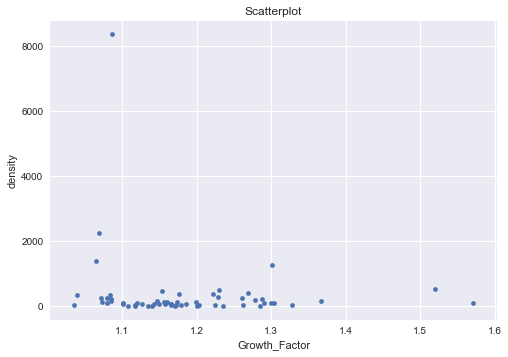

In [65]:
# Create a scatterplot
df_plot=df_all.replace([np.inf, -np.inf], np.nan)
df_plot=df_plot[df_plot['Growth_Factor'] > 0.0]
df_plot=df_plot[df_plot['Max_Index'] >= 7]
df_plot.plot.scatter(x='Growth_Factor', y='density')
plt.title("Scatterplot")
print('Pearson correlation coefficient:')
print(df_plot['Growth_Factor'].corr(df_plot['density']))

Pearson correlation coefficient:
0.33708882057050643


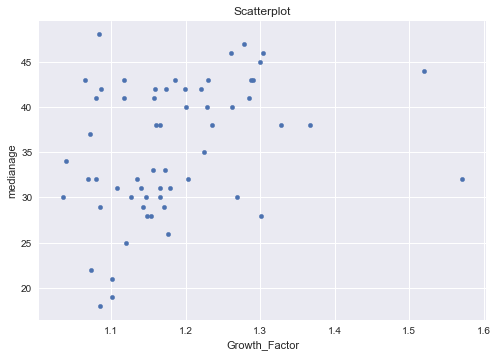

In [66]:
# Create a scatterplot
df_plot=df_plot.replace([np.inf, -np.inf], np.nan)
df_plot=df_plot[df_plot['Growth_Factor'] > 0.0]
df_plot=df_plot[df_plot['Max_Index'] >= 7]
df_plot.plot.scatter(x='Growth_Factor', y='medianage')
plt.title("Scatterplot")
print('Pearson correlation coefficient:')
print(df_plot['Growth_Factor'].corr(df_plot['medianage']))

Pearson correlation coefficient:
0.08178874019624248


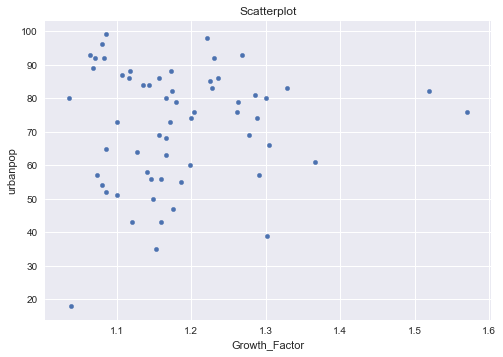

In [67]:
# Create a scatterplot
df_plot=df_plot.replace([np.inf, -np.inf], np.nan)
df_plot=df_plot[df_plot['Growth_Factor'] > 0.0]
df_plot=df_plot[df_plot['Max_Index'] >= 7]
df_plot.plot.scatter(x='Growth_Factor', y='urbanpop')
plt.title("Scatterplot")
print('Pearson correlation coefficient:')
print(df_plot['Growth_Factor'].corr(df_plot['urbanpop']))

Pearson correlation coefficient:
0.2641869923934139


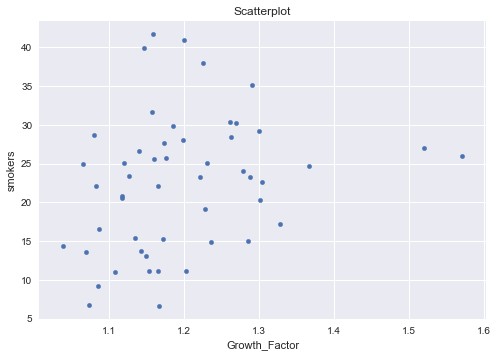

In [68]:
# Create a scatterplot
df_plot=df_plot.replace([np.inf, -np.inf], np.nan)
df_plot=df_plot[df_plot['Growth_Factor'] > 0.0]
df_plot=df_plot[df_plot['Max_Index'] >= 7]
df_plot.plot.scatter(x='Growth_Factor', y='smokers')
plt.title("Scatterplot")
print('Pearson correlation coefficient:')
print(df_plot['Growth_Factor'].corr(df_plot['smokers']))

Pearson correlation coefficient:
0.12467237812092735


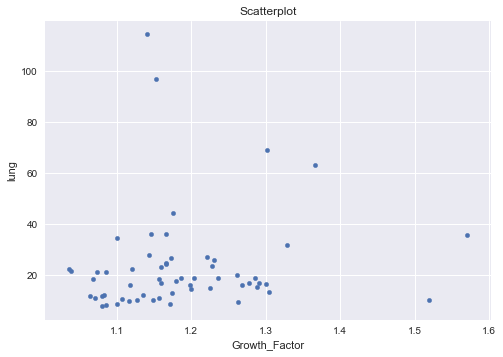

In [69]:
# Create a scatterplot
df_plot=df_plot.replace([np.inf, -np.inf], np.nan)
df_plot=df_plot[df_plot['Growth_Factor'] > 0.0]
df_plot=df_plot[df_plot['Max_Index'] >= 7]
df_plot.plot.scatter(x='Growth_Factor', y='lung')
plt.title("Scatterplot")
print('Pearson correlation coefficient:')
print(df_plot['Growth_Factor'].corr(df_plot['lung']))

Pearson correlation coefficient:
0.33136771731123266


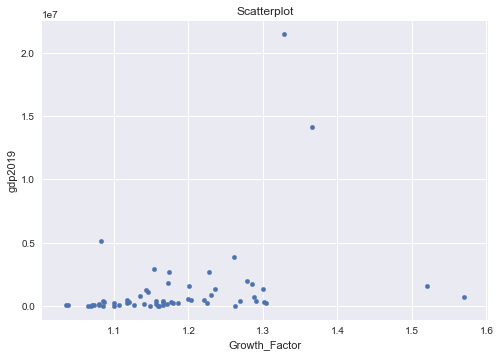

In [70]:
# Create a scatterplot
df_plot=df_plot.replace([np.inf, -np.inf], np.nan)
df_plot=df_plot[df_plot['Growth_Factor'] > 0.0]
df_plot=df_plot[df_plot['Max_Index'] >= 7]
df_plot.plot.scatter(x='Growth_Factor', y='gdp2019')
plt.title("Scatterplot")
print('Pearson correlation coefficient:')
print(df_plot['Growth_Factor'].corr(df_plot['gdp2019']))

Pearson correlation coefficient:
-0.20234530512055596


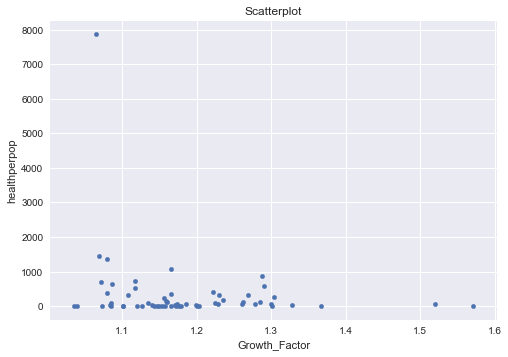

In [71]:
# Create a scatterplot
df_plot=df_plot.replace([np.inf, -np.inf], np.nan)
df_plot=df_plot[df_plot['Growth_Factor'] > 0.0]
df_plot=df_plot[df_plot['Max_Index'] >= 7]
df_plot.plot.scatter(x='Growth_Factor', y='healthperpop')
plt.title("Scatterplot")
print('Pearson correlation coefficient:')
print(df_plot['Growth_Factor'].corr(df_plot['healthperpop']))

Pearson correlation coefficient:
-0.370522083038922


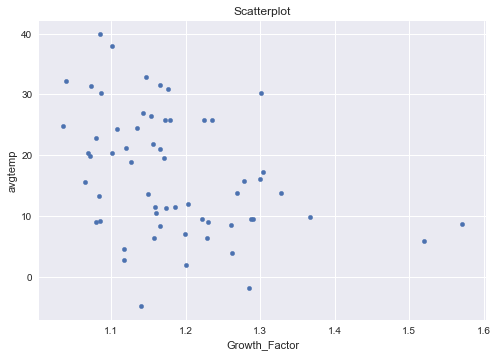

In [72]:
# Create a scatterplot
df_plot=df_plot.replace([np.inf, -np.inf], np.nan)
df_plot=df_plot[df_plot['Growth_Factor'] > 0.0]
df_plot=df_plot[df_plot['Max_Index'] >= 7]
df_plot.plot.scatter(x='Growth_Factor', y='avgtemp')
plt.title("Scatterplot")
print('Pearson correlation coefficient:')
print(df_plot['Growth_Factor'].corr(df_plot['avgtemp']))

Pearson correlation coefficient:
0.06452592338883809


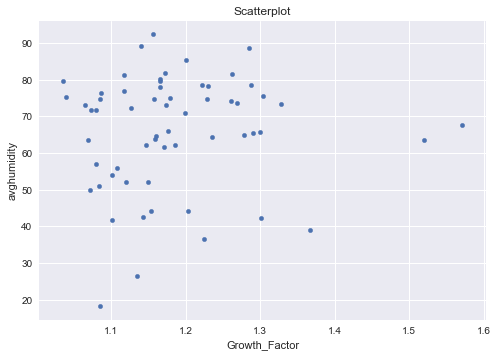

In [73]:
# Create a scatterplot
df_plot=df_plot.replace([np.inf, -np.inf], np.nan)
df_plot=df_plot[df_plot['Growth_Factor'] > 0.0]
df_plot=df_plot[df_plot['Max_Index'] >= 7]
df_plot.plot.scatter(x='Growth_Factor', y='avghumidity')
plt.title("Scatterplot")
print('Pearson correlation coefficient:')
print(df_plot['Growth_Factor'].corr(df_plot['avghumidity']))

### Is it possible to predicted the growth rate of an outbreak?

In [74]:
# Create dataset for machine learning model to predict the growth rate
df_ml=df_all.copy()
df_ml=df_ml.set_index('Country')
df_ml=df_ml.replace([np.inf, -np.inf], np.nan)
df_ml=df_ml[df_ml['Growth_Factor'] > 0.0] # Take only those countries with a growth factor > 0.0 (where an outbreak was detected)
df_ml=df_ml[df_ml['Max_Index'] >= 7]
df_ml=df_ml.dropna(subset=['Lat', 'Long', 'density', 'medianage', 'urbanpop', 'smokers', 'lung', 'gdp2019', 'healthperpop', 'avgtemp', 'avghumidity', 'Growth_Factor'])
print("Remaining countries in dataset after removal of rows with inf and nan: ", df_ml.shape[0], "/", df_all.shape[0])
X = df_ml[['Lat', 'Long', 'density', 'medianage', 'urbanpop', 'smokers', 'lung', 'gdp2019', 'healthperpop', 'avgtemp', 'avghumidity']]
y = df_ml['Growth_Factor']
X.head()


Remaining countries in dataset after removal of rows with inf and nan:  51 / 172


Lat        Long  density  medianage  urbanpop  smokers  \
Country                                                                    
Australia  -31.996188  141.232788      3.0       38.0      86.0    14.90   
Austria     47.516200   14.550100    109.0       43.0      57.0    35.15   
Bahrain     26.027500   50.550000   2239.0       32.0      89.0    13.60   
Bangladesh  23.685000   90.356300   1265.0       28.0      39.0    20.25   
Belarus     53.709800   27.953400     47.0       40.0      79.0    28.40   

             lung    gdp2019  healthperpop    avgtemp  avghumidity  
Country                                                             
Australia   18.79  1376255.0    176.157664  25.783333    64.233333  
Austria     17.02   447718.0    570.483339   9.466667    65.350000  
Bahrain     18.37    38184.0   1441.605571  20.366667    63.516667  
Bangladesh  69.07   317465.0      0.534339  30.283333    42.350000  
Belarus      9.46    62572.0    114.823041   3.983333    81.483333

In [75]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

# Instantiate
lm_model = LinearRegression(normalize=True) 

# Fit
lm_model.fit(X_train, y_train) 

# Predict on train (to get the r2 value for comparison)
y_train_preds = lm_model.predict(X_train)

# Rsquared here for comparing train and preds from model
r2_train =  r2_score(y_train, y_train_preds)

# Print r2 to see result on test data
print('The R^2 value on train is:', r2_train)

# Predict
y_test_preds = lm_model.predict(X_test)

# Rsquared here for comparing test and preds from model
r2_test =  r2_score(y_test, y_test_preds)

# Print r2 to see result on test data
print('The R^2 value on test is:', r2_test)


The R^2 value on train is: 0.48061886019958633
The R^2 value on test is: -0.17618041480533697


### Is it possible to predict the effect of measures against an outbreak?

In [76]:
# Create dataset for machine learning model to predict the effect of measures
df_ml=df_all.copy()
df_ml=df_ml.set_index('Country')
df_ml=df_ml.replace([np.inf, -np.inf], np.nan)
df_ml=df_ml[df_ml['Max_Index'] >= 7]
df_ml=df_ml.dropna(subset=['Lat', 'Long', 'density', 'medianage', 'urbanpop', 'smokers', 'lung', 'gdp2019', 'healthperpop', 'avgtemp', 'avghumidity', 'quarantine', 'schools', 'publicplace', 'gathering', 'nonessential', 'Days_till_Max'])
print("Remaining countries in dataset after removal of rows with inf and nan: ", df_ml.shape[0], "/", df_all.shape[0])
X = df_ml[['Lat', 'Long', 'density', 'medianage', 'urbanpop', 'smokers', 'lung', 'gdp2019', 'healthperpop', 'avgtemp', 'avghumidity', 'quarantine', 'schools', 'publicplace', 'gathering', 'nonessential']]
y = df_ml['Days_till_Max']
X.head()

Remaining countries in dataset after removal of rows with inf and nan:  51 / 172


Lat        Long  density  medianage  urbanpop  smokers  \
Country                                                                    
Australia  -31.996188  141.232788      3.0       38.0      86.0    14.90   
Austria     47.516200   14.550100    109.0       43.0      57.0    35.15   
Bahrain     26.027500   50.550000   2239.0       32.0      89.0    13.60   
Bangladesh  23.685000   90.356300   1265.0       28.0      39.0    20.25   
Belarus     53.709800   27.953400     47.0       40.0      79.0    28.40   

             lung    gdp2019  healthperpop    avgtemp  avghumidity  \
Country                                                              
Australia   18.79  1376255.0    176.157664  25.783333    64.233333   
Austria     17.02   447718.0    570.483339   9.466667    65.350000   
Bahrain     18.37    38184.0   1441.605571  20.366667    63.516667   
Bangladesh  69.07   317465.0      0.534339  30.283333    42.350000   
Belarus      9.46    62572.0    114.823041   3.983333    81.483333   

            quarantine  schools  publicplace  gathering  nonessential  
Country                                                                
Australia         1000     1000           13         19          1000  
Austria              8     1000         1000       1000          1000  
Bahrain           1000     1000         1000       1000          1000  
Bangladesh        1000     1000         1000       1000          1000  
Belarus           1000     1000         1000       1000          1000

In [77]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit
lm_model.fit(X_train, y_train) 

# Predict on train (to get the r2 value for comparison)
y_train_preds = lm_model.predict(X_train)

# Rsquared here for comparing train and preds from model
r2_train =  r2_score(y_train, y_train_preds)

# Print r2 to see result on test data
print('The R^2 value on train is:', r2_train)

# Predict
y_test_preds = lm_model.predict(X_test)

# Rsquared here for comparing test and preds from model
r2_test =  r2_score(y_test, y_test_preds)

# Print r2 to see result on test data
print('The R^2 value on test is:', r2_test)


The R^2 value on train is: 0.44663831496773454
The R^2 value on test is: -0.24590015216365768
